<a href="https://colab.research.google.com/github/SeungbeomDo/Projects/blob/main/BIGCONTEST_DATA_ANALYSIS_FALL_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#코드 목차

<br>
0. 데이터 불러오기<br>
#0.1. 필요한 라이브러리 목록 <br>
#0.2. 데이터 임포트 <br>

<br>
1. 데이터 전처리<br>
#1.1. 데이터 병합<br>
##1.1.1. Loan 데이터와 Spec 데이터 병합<br>
#1.2. 변수 처리<br>
##1.2.1. 변수 조작<br>
##1.2.2. 결측치 처리<br>
#1.3. 데이터 6월 기준으로 분리<br>
##1.3.1. spec_loan 데이터의 분리<br>
##1.3.2. log 데이터의 분리<br>
#1.4. 한번이라도 대출을 받은 사람을 표시<br>
#1.5. log 데이터의 유저별 데이터로 변환<br>
##1.5.1. log 데이터의 유저별 데이터로 변환<br>

<br>
2. 탐색적 데이터 분석<br>
#2.1. Spec 데이터 탐색<br>
##2.1.1. Spec 데이터와 대출금리의 상관관계<br>
##2.1.2. Spec 데이터와 대출한도의 상관관계<br>
##2.1.3. Spec 데이터와 대출신청여부의 상관관계<br>
#2.2. Loan 데이터 탐색<br>
##2.2.1. 대출금리 및 대출한도의 신청여부와의 상관관계<br>
##2.2.2. 은행 및 대출상품유형별 대출 신청률<br>
#2.3. Log 데이터 탐색<br>
##2.3.1. 대출신청여부에 따른 행동별 횟수 차이<br>

<br>
3. 예측 모델 훈련<br>
#3.1. 인풋 변수 선택<br>
#3.2. train 데이터와 test 데이터 분리<br>
#3.3. 유저가 대출을 받을 확률 예측 훈련<br>
##3.3.1. 유저 예측 훈련 train set 분리<br>
##3.3.2. 모델 훈련<br>
##3.3.3. 유저 예측 모델 성능<br>
#3.4. 유저가 대출을 받을 때 주어진 상품이 선택될 확률 예측 훈련<br>
##3.4.1. 상품 예측 훈련 train set 분리<br>
##3.4.2. 모델 훈련<br>
##3.4.3. 상품 예측 모델 성능<br>

<br>
4. 예측 모델 평가<br>
#4.1. 유저가 대출을 받을 확률<br>
#4.2. 유저가 대출을 받을 때 상품이 선택될 확률<br>
#4.3. 최종 예측과 성능<br>

<br>
5. 6월 예측<br>
#5.1. 3~5월 데이터 전체에 대하여 훈련<br>
#5.2. 유저 예측 훈련<br>
#5.3. 상품 예측 훈련<br>
#5.4. 예측값 산출<br>

#0. 데이터 불러오기

##0.1. 필요한 라이브러리 목록 <br>

In [ ]:
#데이터 전처리, 조작, 시각화에 필요한 라이브러리

import pandas as pd #데이터프레임 조작 과정
import numpy as np #데이터 가공 과정
import matplotlib.pyplot as plt #시각화 라이브러리

#모델 훈련에 사용하는 라이브러리
from sklearn.linear_model import LinearRegression #선형회귀 모델
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 분류 모델
from sklearn.metrics import accuracy_score #모델 성능 측정
from sklearn.metrics import precision_score #모델 성능 측정
from sklearn.metrics import recall_score #모델 성능 측정
from sklearn.metrics import f1_score #모델 성능 측정
from sklearn.metrics import confusion_matrix #모델 성능 측정
from sklearn.preprocessing import minmax_scale #데이터 스케일링
from sklearn.model_selection import train_test_split #훈련/검증 데이터 분리
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN #오버샘플링
from collections import Counter #오버샘플링
import joblib #훈련된 모델 저장


In [ ]:
#Google Colab

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리


##0.2. 데이터 임포트

In [ ]:
#loan_result, log_data, user_spec 각각 불러와 loan, log, spec으로 저장


loan = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/Data/raw data/loan_result.csv')
loan = pd.DataFrame(loan)

log = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/Data/raw data/log_data.csv')
log = pd.DataFrame(log)

spec = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/Data/raw data/user_spec.csv')
spec = pd.DataFrame(spec)

In [ ]:
#raw data의 정보

print('<loan data>')
print('크기 : ', len(loan), '*', len(loan.columns))
print('변수명 : ', loan.columns)
print('고유한 대출신청번호의 수 : ', len(loan['application_id'].unique()))
print('')

print('<log data>')
print('크기 : ', len(log), '*', len(log.columns))
print('변수명 : ', log.columns)
print('고유한 유저의 수 : ', len(spec['user_id'].unique()))
print('')

print('<spec data>')
print('크기 : ', len(spec), '*', len(spec.columns))
print('변수명 : ', spec.columns)
print('고유한 유저의 수 : ', len(log['user_id'].unique()))


<loan data>
크기 :  13527363 * 7
변수명 :  Index(['application_id', 'loanapply_insert_time', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'is_applied'],
      dtype='object')
고유한 대출신청번호의 수 :  968866

<log data>
크기 :  17843993 * 6
변수명 :  Index(['user_id', 'event', 'timestamp', 'mp_os', 'mp_app_version', 'date_cd'], dtype='object')
고유한 유저의 수 :  405213

<spec data>
크기 :  1394216 * 17
변수명 :  Index(['application_id', 'user_id', 'birth_year', 'gender', 'insert_time',
       'credit_score', 'yearly_income', 'income_type', 'company_enter_month',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt'],
      dtype='object')
고유한 유저의 수 :  584636


In [ ]:
#결측값 확인

print('Loan data')
print(loan.isna().sum())
print('')

print('Log data')
print(log.isna().sum())
print('')

print('Spec data')
print(spec.isna().sum())

Loan data
application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
dtype: int64

Log data
user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

Spec data
application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              8

#1. 데이터 전처리

##1.1. 데이터 병합

###1.1.1. spec data와 loan data를 application_id를 기준으로 right join

In [ ]:
spec_loan = pd.merge(spec, loan, left_on='application_id', right_on='application_id', how='right')

In [ ]:
#spec_loan 병합된 data의 정보

print('<spec_loan data>')
print('크기 : ', len(spec_loan), '*', len(spec_loan.columns))
print('변수명 : ', spec_loan.columns)
print('고유한 유저의 수 : ', len(spec_loan['user_id'].unique()))
print('고유한 대출신청서의 수 : ', len(spec_loan['application_id'].unique()))


<spec_loan data>
크기 :  13527363 * 23
변수명 :  Index(['application_id', 'user_id', 'birth_year', 'gender', 'insert_time',
       'credit_score', 'yearly_income', 'income_type', 'company_enter_month',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt', 'loanapply_insert_time',
       'bank_id', 'product_id', 'loan_limit', 'loan_rate', 'is_applied'],
      dtype='object')
고유한 유저의 수 :  317468
고유한 대출신청서의 수 :  968866


In [ ]:
#결측값 확인

print('Spec_Loan data')
print(spec_loan.isna().sum())
print('')

Spec_Loan data
application_id                                0
user_id                                     113
birth_year                               128209
gender                                   128209
insert_time                                 113
credit_score                            1509389
yearly_income                               119
income_type                                 113
company_enter_month                      400450
employment_type                             113
houseown_type                               113
desired_amount                              113
purpose                                     113
personal_rehabilitation_yn              5888814
personal_rehabilitation_complete_yn    11794090
existing_loan_cnt                       2685822
existing_loan_amt                       3890276
loanapply_insert_time                         0
bank_id                                       0
product_id                                    0
loan_limit               

In [ ]:
#loan data에는 있는데 user data에는 없는 경우, 주최측의 안내에 따라 drop

spec_loan = spec_loan.dropna(subset = ['user_id']) 

In [ ]:
#loan_limit과 loan_rate가 결측치인 경우, 주최측의 안내에 따라 drop

spec_loan = spec_loan.dropna(subset = ['loan_limit']) 
spec_loan = spec_loan.dropna(subset = ['loan_rate'])

In [ ]:
#결측값 제거 후 데이터 프레임 정보

print('<spec_loan data>')
print('크기 : ', len(spec_loan), '*', len(spec_loan.columns))
print('변수명 : ', spec_loan.columns)
print('고유한 유저의 수 : ', len(spec_loan['user_id'].unique()))
print('고유한 대출신청서의 수 : ', len(spec_loan['application_id'].unique()))

<spec_loan data>
크기 :  13519868 * 23
변수명 :  Index(['application_id', 'user_id', 'birth_year', 'gender', 'insert_time',
       'credit_score', 'yearly_income', 'income_type', 'company_enter_month',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt', 'loanapply_insert_time',
       'bank_id', 'product_id', 'loan_limit', 'loan_rate', 'is_applied'],
      dtype='object')
고유한 유저의 수 :  317458
고유한 대출신청서의 수 :  968727


In [ ]:
#나머지 결측값

print('Spec_Loan data')
print(spec_loan.isna().sum())
print('')

Spec_Loan data
application_id                                0
user_id                                       0
birth_year                               128038
gender                                   128038
insert_time                                   0
credit_score                            1508618
yearly_income                                 6
income_type                                   0
company_enter_month                      399201
employment_type                               0
houseown_type                                 0
desired_amount                                0
purpose                                       0
personal_rehabilitation_yn              5885910
personal_rehabilitation_complete_yn    11787488
existing_loan_cnt                       2684723
existing_loan_amt                       3888718
loanapply_insert_time                         0
bank_id                                       0
product_id                                    0
loan_limit               

##1.2. 변수 처리

###1.2.1. 변수 조작

In [ ]:
#태어난 연도를 연령으로 바꾸기

spec_loan['birth_year'] = round(2022 - spec_loan['birth_year']) #태어난 연도를 연령으로 바꾸기
spec_loan = spec_loan.rename(columns={'birth_year' : 'age'}) #변수명을 연령으로 바꾸기

In [ ]:
#purpose 변수는 한글과 영어가 혼합돼있어 영어로 통일

purpose_rename = []
for i in spec_loan['purpose']:
  if i == '주택구입':
    k = 'BUYHOUSE'
  elif i == '전월세보증금':
    k = 'HOUSEDEPOSIT'
  elif i == '투자':
    k = 'INVEST'
  elif i == '자동차구입':
    k = 'BUYCAR'
  elif i == '기타':
    k = 'ETC'
  elif i == '사업자금':
    k = 'BUSINESS'
  elif i == '생활비':
    k = 'LIVING'
  elif i == '대환대출':
    k = 'SWITCHLOAN'
  else:
    k = i
  purpose_rename.append(k)
spec_loan['purpose'] = purpose_rename

###1.2.2. 결측치 처리

In [ ]:
#결측값이 너무 많은 개인회생관련 칼럼 2개는 drop

spec_loan.value_counts('personal_rehabilitation_complete_yn')
spec_loan = spec_loan.drop(['personal_rehabilitation_complete_yn', 'personal_rehabilitation_yn'], axis = 1) 

In [ ]:
#기존대출금액은 결측값이 너무 많고 (약 3백만개) 합리적 추정이 불가능하여 칼럼 drop
spec_loan = spec_loan.drop('existing_loan_amt', axis = 1)

In [ ]:
#입사월은 결측값이 너무 많고 (약 40만개) 합리적 추정이 불가능하여 칼럼 drop
spec_loan = spec_loan.drop('company_enter_month', axis = 1)

In [ ]:
#기존대출개수의 최소값이 1이므로, 결측값은 기존대출이 없다는 것으로 간주

spec_loan['existing_loan_cnt'].fillna(0, inplace = True) 
spec_loan['existing_loan_cnt'].min()

0.0

In [ ]:
#yearly_income의 경우 결측치가 6으로 매우 작으므로, 해당 칼럼의 평균으로 대체

spec_loan['yearly_income'] = spec_loan['yearly_income'].fillna(spec_loan['yearly_income'].mean())

In [ ]:
#credit score의 경우 결측치가 많고 중요한 변수이므로, 선형회귀분석 결과로 대체

##선형회귀 결과로 신용점수가 1000점이 넘지 않도록 하기 위하여, 0~1사이의 값으로 min-max 스케일링

spec_loan['credit_score'] = minmax_scale(spec_loan['credit_score'])

##범주형 변수들을 회귀분석 모델의 인풋으로 사용하기 위하여, 인코딩하는 과정

uniq_incom_type = spec_loan['income_type'].unique().tolist() 
income_type_dict= {'PRACTITIONER':6, 'EARNEDINCOME':5,'EARNEDINCOME2':4 ,
                   'PRIVATEBUSINESS':3,'FREELANCER':2,'OTHERINCOME':1, 'nan':0}

uniq_house_type= spec_loan['houseown_type'].unique().tolist()
house_type_dict= {'자가':4, '배우자':3, '기타가족소유':2, '전월세':1,'nan':0 }

uniq_employment_type = spec_loan['employment_type'].unique().tolist()
employment_type_dict= {'정규직':4, '계약직':3, '일용직':2, '기타':1 , 'nan':0 }

def mapp_income(x):
  x= str(x)
  x=income_type_dict[x]
  return x

spec_loan['income_type'] = spec_loan['income_type'].apply(mapp_income)

def mapp_house(x):
  x= str(x)
  x=house_type_dict[x]
  return x

spec_loan['houseown_type'] = spec_loan['houseown_type'].apply(mapp_house)

def mapp_emp(x):
  x= str(x)
  x=employment_type_dict[x]
  return x

spec_loan['employment_type'] = spec_loan['employment_type'].apply(mapp_emp)

##금리 및 대출한도를 회귀모형의 입력변수로 사용
##단, 개인 내에서도 금리 및 대출한도가 바뀐다는 점을 감안하여 개인이 제시 받은 평균 금리 및 평균 한도로 대체

user_rate_mean = spec_loan.groupby('user_id')['loan_rate'].mean()
user_limit_mean = spec_loan.groupby('user_id')['loan_limit'].mean()

loan_st = pd.DataFrame()
loan_st['user_id'] = spec_loan['user_id'].unique()
loan_st = loan_st.sort_values('user_id')
loan_st['rate_mean'] = user_rate_mean.tolist()
loan_st['limit_mean'] = user_limit_mean.tolist()

spec_loan = pd.merge(spec_loan, loan_st, left_on = 'user_id', right_on = 'user_id', how = 'left')

##회귀분석 과정

X_train = spec_loan[spec_loan['credit_score'].isna() == False] #결측이 아닌 행들을 모델 훈련에 사용
X_test =  spec_loan[spec_loan['credit_score'].isna()] #결측인 행들을 테스트셋으로 사용

#회귀모형의 종속변수는 신용점수

y_train = spec_loan[spec_loan['credit_score'].isna() == False]['credit_score']

#회귀모형의 독립변수는 소득, 소득형태, 주거형태, 고용형태, 개인별 평균 대출한도 및 평균 대출금리

X_train = X_train[['yearly_income','income_type','houseown_type','employment_type', 'limit_mean', 'limit_mean']] 
X_test = X_test[['yearly_income','income_type','houseown_type','employment_type', 'limit_mean', 'limit_mean']]

lr = LinearRegression()
lr.fit(X_train,y_train)

##회귀모형의 예측값으로 credit_score 대체

y_pred = lr.predict(X_test)
spec_loan.loc[X_test.index, 'credit_score'] = y_pred

##예측값이 0~1범위를 초과했을 수 있으므로 다시 한 번 스케일링
spec_loan['credit_score'] = minmax_scale(spec_loan['credit_score'])

##원래 신용점수와 동일하게 0~1000의 값을 갖게 하기 위하여 1000을 곱하기
spec_loan['credit_score'] = spec_loan['credit_score'] * 1000

##사용한 평균 금리 및 한도는 드랍
spec_loan = spec_loan.drop(['limit_mean', 'rate_mean'], axis = 1)


(array([2.355000e+03, 1.298000e+03, 1.510000e+03, 1.633300e+05,
        3.109121e+06, 4.860443e+06, 2.898177e+06, 2.483595e+06,
        2.400000e+01, 1.500000e+01]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

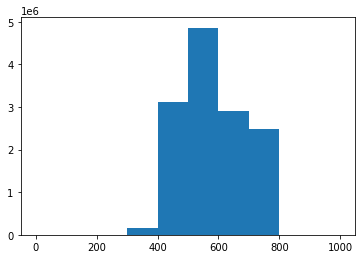

In [ ]:
plt.hist(spec_loan['credit_score']) #스케일-선형회귀가 완료된 신용점수

In [ ]:
#결측값 제거 후 데이터 프레임 정보

print('<spec_loan data>')
print('크기 : ', len(spec_loan), '*', len(spec_loan.columns))
print('변수명 : ', spec_loan.columns)
print('고유한 유저의 수 : ', len(spec_loan['user_id'].unique()))
print('고유한 대출신청서의 수 : ', len(spec_loan['application_id'].unique()))

<spec_loan data>
크기 :  13519868 * 19
변수명 :  Index(['application_id', 'user_id', 'age', 'gender', 'insert_time',
       'credit_score', 'yearly_income', 'income_type', 'employment_type',
       'houseown_type', 'desired_amount', 'purpose', 'existing_loan_cnt',
       'loanapply_insert_time', 'bank_id', 'product_id', 'loan_limit',
       'loan_rate', 'is_applied'],
      dtype='object')
고유한 유저의 수 :  317458
고유한 대출신청서의 수 :  968727


In [ ]:
#결측값 확인

print('Spec_Loan data')
print(spec_loan.isna().sum())
print('')

Spec_Loan data
application_id                 0
user_id                        0
age                       128038
gender                    128038
insert_time                    0
credit_score                   0
yearly_income                  0
income_type                    0
employment_type                0
houseown_type                  0
desired_amount                 0
purpose                        0
existing_loan_cnt              0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                     0
loan_rate                      0
is_applied               3255482
dtype: int64



##1.3. 3~5월 데이터와 6월 데이터를 분리

###1.3.1. spec_loan 데이터의 분리

In [ ]:
from datetime import datetime #datetime 함수 사용

spec_loan['loanapply_insert_time'] = pd.to_datetime(spec_loan['loanapply_insert_time'], format = '%Y-%m-%d %H:%M:%S')
#spec_loan의 loanapply_insert_time 변수를 날짜형 변수로 변환

spec_loan_345 = spec_loan[spec_loan['loanapply_insert_time'] < datetime(2022, 6, 1, 0, 0, 0)]
spec_loan_6 = spec_loan[spec_loan['loanapply_insert_time'] >= datetime(2022, 6, 1, 0, 0, 0)]
#loanapply_insert_time을 기준으로 spec_loan 데이터를 분리

In [ ]:
print('spec_loan_345의 크기 : ', len(spec_loan_345), '*', len(spec_loan_345.columns))
print('spec_loan_345에 포함된 6월 데이터의 수 : ', sum(spec_loan_345['loanapply_insert_time'] >= datetime(2022, 6, 1, 0, 0, 0)))
print('고유한 유저의 수 : ', len(spec_loan_345['user_id'].unique()))
print('고유한 대출신청서의 수 : ', len(spec_loan_345['application_id'].unique()))
print('')
print('날짜순으로 정렬하여 6월 데이터 포함 안 된 것 확인')
spec_loan_345['loanapply_insert_time'].sort_values()

spec_loan_345의 크기 :  10264386 * 19
spec_loan_345에 포함된 6월 데이터의 수 :  0
고유한 유저의 수 :  259321
고유한 대출신청서의 수 :  728862

날짜순으로 정렬하여 6월 데이터 포함 안 된 것 확인


754620    2022-03-01 00:11:36
1116251   2022-03-01 00:12:05
1116254   2022-03-01 00:12:05
1116252   2022-03-01 00:12:06
2659169   2022-03-01 00:12:06
                  ...        
1385926   2022-05-31 23:54:28
1385936   2022-05-31 23:54:28
1385940   2022-05-31 23:54:29
1385930   2022-05-31 23:54:37
688398    2022-05-31 23:54:38
Name: loanapply_insert_time, Length: 10264386, dtype: datetime64[ns]

In [ ]:
spec_loan_345.isna().sum()

application_id               0
user_id                      0
age                      91585
gender                   91585
insert_time                  0
credit_score                 0
yearly_income                0
income_type                  0
employment_type              0
houseown_type                0
desired_amount               0
purpose                      0
existing_loan_cnt            0
loanapply_insert_time        0
bank_id                      0
product_id                   0
loan_limit                   0
loan_rate                    0
is_applied                   0
dtype: int64

In [ ]:
print('spec_loan_6의 크기 : ', len(spec_loan_6), '*', len(spec_loan_6.columns))
print('spec_loan_6에 포함된 3~5월 데이터의 수 : ', sum(spec_loan_6['loanapply_insert_time'] < datetime(2022, 6, 1, 0, 0, 0)))
print('고유한 유저의 수 : ', len(spec_loan_6['user_id'].unique()))
print('고유한 대출신청서의 수 : ', len(spec_loan_6['application_id'].unique()))
print('')
print('날짜순으로 정렬하여 3~5월 데이터 포함 안 된 것 확인')
spec_loan_6['loanapply_insert_time'].sort_values()

spec_loan_6의 크기 :  3255482 * 19
spec_loan_6에 포함된 3~5월 데이터의 수 :  0
고유한 유저의 수 :  118185
고유한 대출신청서의 수 :  239865

날짜순으로 정렬하여 3~5월 데이터 포함 안 된 것 확인


6628576   2022-06-01 00:12:24
6685263   2022-06-01 00:12:24
6685261   2022-06-01 00:12:24
6685257   2022-06-01 00:12:24
6685258   2022-06-01 00:12:25
                  ...        
9020207   2022-06-30 23:54:48
9020205   2022-06-30 23:54:48
9020201   2022-06-30 23:54:48
8978433   2022-06-30 23:54:52
8978431   2022-06-30 23:55:00
Name: loanapply_insert_time, Length: 3255482, dtype: datetime64[ns]

###1.3.2. log 데이터의 분리

In [ ]:
log['timestamp'] = pd.to_datetime(log['timestamp'], format = '%Y-%m-%d %H:%M:%S')
#spec_loan의 timestamp 변수를 날짜형 변수로 변환

log_345 = log[log['timestamp'] < datetime(2022, 6, 1, 0, 0, 0)]
log_6 = log[log['timestamp'] >= datetime(2022, 6, 1, 0, 0, 0)]
#timestamp를 기준으로 log 데이터를 분리

In [ ]:
print('log_345의 크기 : ', len(log_345), '*', len(log_345.columns))
print('log_345에 포함된 6월 데이터의 수 : ', sum(log_345['timestamp'] >= datetime(2022, 6, 1, 0, 0, 0)))
print('고유한 유저의 수 : ', len(log_345['user_id'].unique()))
print('')
print('날짜순으로 정렬하여 6월 데이터 포함 안 된 것 확인')
log_345['timestamp'].sort_values()

log_345의 크기 :  12907328 * 6
log_345에 포함된 6월 데이터의 수 :  0
고유한 유저의 수 :  479773

날짜순으로 정렬하여 6월 데이터 포함 안 된 것 확인


4836383   2022-03-01 00:00:00
475653    2022-03-01 00:00:00
3640942   2022-03-01 00:00:00
6354402   2022-03-01 00:00:03
2809      2022-03-01 00:00:03
                  ...        
4889342   2022-05-31 23:59:54
4889343   2022-05-31 23:59:54
6979109   2022-05-31 23:59:57
6979107   2022-05-31 23:59:57
8859927   2022-05-31 23:59:59
Name: timestamp, Length: 12907328, dtype: datetime64[ns]

In [ ]:
print('log_6의 크기 : ', len(log_6), '*', len(log_6.columns))
print('log_6에 포함된 3~5월 데이터의 수 : ', sum(log_6['timestamp'] < datetime(2022, 6, 1, 0, 0, 0)))
print('고유한 유저의 수 : ', len(log_6['user_id'].unique()))
print('')
print('날짜순으로 정렬하여 6월 데이터 포함 안 된 것 확인')
log_6['timestamp'].sort_values()

log_6의 크기 :  4936665 * 6
log_6에 포함된 3~5월 데이터의 수 :  0
고유한 유저의 수 :  305782

날짜순으로 정렬하여 6월 데이터 포함 안 된 것 확인


1330048    2022-06-01 00:00:02
1330047    2022-06-01 00:00:02
13067247   2022-06-01 00:00:04
16342736   2022-06-01 00:00:05
16342737   2022-06-01 00:00:05
                   ...        
1285893    2022-06-30 23:59:53
11511066   2022-06-30 23:59:56
11511067   2022-06-30 23:59:57
6011502    2022-06-30 23:59:57
6011503    2022-06-30 23:59:58
Name: timestamp, Length: 4936665, dtype: datetime64[ns]

##1.4. 한 번이라도 대출을 신청한 경우를 표시

In [ ]:
spec_loan_345_applied = spec_loan_345[spec_loan_345['is_applied'] == 1] #대출이 신청된 경우
spec_loan_345_denied = spec_loan_345[spec_loan_345['is_applied'] == 0] #대출이 신청되지 않은 경우

print('3~5월에 대출이 신청된 경우는 총 ', len(spec_loan_345_applied), '번')
print('3~5월에 대출이 거절된 경우는 총 ', len(spec_loan_345_denied), '번')

3~5월에 대출이 신청된 경우는 총  554711 번
3~5월에 대출이 거절된 경우는 총  9709675 번


In [ ]:
spec_loan_345_applied_unique = spec_loan_345_applied.drop_duplicates(['user_id']) #대출이 신청된 경우에서 고유한 user_id만 남기기
spec_loan_345_denied_unique = spec_loan_345_denied.drop_duplicates(['user_id']) #대출이 신청되지 않은 경우에서 고유한 user_id만 남기기

appid = spec_loan_345_applied_unique['user_id'].unique() #대출이 신청된 경우의 user_id를 저장, 즉 대출을 한 번이라도 신청한 유저들
spec_loan_345_denied_unique_real = spec_loan_345_denied_unique[spec_loan_345_denied_unique['user_id'].isin(appid) == False] 
#대출이 신청되지 않은 경우는, 대출을 신청한 유저가 해당 대출상품을 신청하지 않은 경우와, 대출을 아예 신청하지 않은 유저인 경우를 포함하고 있음
#대출을 아예 신청하지 않은 유저만을 분리해내기 위해서, appid에 저장된 user_id에 포함되지 않은 user_id의 행들을 남겼음

print('3~5월에 한 번이라도 대출을 신청한 유저의 수 : ', len(spec_loan_345_applied_unique))
print('3~5월에 한 번도 대출을 신청하지 않은 유저의 수 : ', len(spec_loan_345_denied_unique_real))

3~5월에 한 번이라도 대출을 신청한 유저의 수 :  176656
3~5월에 한 번도 대출을 신청하지 않은 유저의 수 :  82665


In [ ]:
user_applied = pd.concat([spec_loan_345_applied_unique, spec_loan_345_denied_unique_real])[['user_id', 'is_applied']]
user_applied = user_applied.rename(columns={'is_applied' : 'applied_once'}) #기존의 is_applied와 구분하기 위해 칼럼명을 applied_once로 변경
user_applied #유저별로 한 번이라도 대출을 신청한 사람인지, 그렇지 않은 사람인지 구분하는 데이터프레임

,user_id,applied_once
13276,346970.0,1.0
13296,558819.0,1.0
13375,68769.0,1.0
13400,561011.0,1.0
13417,85206.0,1.0
...,...,...
13511637,72021.0,0.0
13511864,815960.0,0.0
13511866,3625.0,0.0
13511871,52722.0,0.0


In [ ]:
#applied_once를 원 데이터프레임에 칼럼으로 추가

spec_loan_345 = pd.merge(spec_loan_345, user_applied, left_on='user_id', right_on='user_id', how='left')
spec_loan_345 

,application_id,user_id,age,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,applied_once
0,2157865,346970.0,52.0,1.0,2022-05-09 08:44:57,405.463757,32000000.0,5,4,4,10000000.0,LIVING,12.0,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0,1.0
1,576643,545882.0,45.0,1.0,2022-05-09 10:54:51,439.252403,72000000.0,5,4,1,20000000.0,LIVING,7.0,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0,1.0
2,576643,545882.0,45.0,1.0,2022-05-09 10:54:51,439.252403,72000000.0,5,4,1,20000000.0,LIVING,7.0,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0,1.0
3,2136706,558819.0,39.0,1.0,2022-05-09 10:41:05,574.406989,39000000.0,5,4,1,80000000.0,SWITCHLOAN,2.0,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0,1.0
4,2136706,558819.0,39.0,1.0,2022-05-09 10:41:05,574.406989,39000000.0,5,4,1,80000000.0,SWITCHLOAN,2.0,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264381,1969227,109899.0,45.0,1.0,2022-05-16 14:42:55,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,9.0,2022-05-16 14:42:58,2,7,30000000.0,13.6,0.0,1.0
10264382,1969227,109899.0,45.0,1.0,2022-05-16 14:42:55,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,9.0,2022-05-16 14:42:57,33,110,9000000.0,14.4,0.0,1.0
10264383,1969227,109899.0,45.0,1.0,2022-05-16 14:42:55,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,9.0,2022-05-16 14:42:56,50,142,3000000.0,11.2,0.0,1.0
10264384,1969227,109899.0,45.0,1.0,2022-05-16 14:42:55,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,9.0,2022-05-16 14:43:18,22,100,4000000.0,15.3,0.0,1.0


In [ ]:
#로그 데이터에도 칼럼 추가해주기

log_345 = pd.merge(log_345, user_applied, left_on='user_id', right_on='user_id', how='left')
log_345 

,user_id,event,timestamp,mp_os,mp_app_version,date_cd,applied_once
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25,1.0
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25,1.0
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25,1.0
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25,1.0
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25,1.0
...,...,...,...,...,...,...,...
12907323,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27,1.0
12907324,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27,1.0
12907325,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27,1.0
12907326,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27,1.0


##1.5. log data를 유저별 행동별 횟수 데이터로 변환

###1.5.1. log data를 유저별 행동별 횟수 데이터로 변환

In [ ]:
log_user_345 = log_345[['user_id', 'event']] #user_id와 event만 저장
log_user_345 = pd.DataFrame(log_user_345.groupby(['user_id', 'event']).size().unstack()) #user_id별 event별 개수로 데이터프레임 전환
log_user_345 = log_user_345.fillna(0) #행동 횟수가 결측치인 경우 해당 행동을 하지 않은 것으로 간주하여 0으로 처리

#6월 log 데이터에서도 동일한 과정 적용
log_user_6 = log_6[['user_id', 'event']] #user_id와 event만 저장
log_user_6 = pd.DataFrame(log_user_6.groupby(['user_id', 'event']).size().unstack()) #user_id별 event별 개수로 데이터프레임 전환
log_user_6 = log_user_6.fillna(0) #행동 횟수가 결측치인 경우 해당 행동을 하지 않은 것으로 간주하여 0으로 처리

In [ ]:
print('<log_user_345>')
print(len(log_user_345), '명의 유저들의', len(log_user_345.columns), '개 행동의 횟수')
print('')
print(log_user_345)

<log_user_345>
479773 명의 유저들의 11 개 행동의 횟수

event    CompleteIDCertification  EndLoanApply  GetCreditInfo  Login  OpenApp  \
user_id                                                                         
1                            0.0           0.0            2.0    0.0      0.0   
7                            0.0           0.0            1.0    0.0      0.0   
9                            0.0           0.0            3.0    0.0      0.0   
11                           2.0           5.0            8.0    0.0      3.0   
12                          10.0          28.0            3.0   11.0     11.0   
...                          ...           ...            ...    ...      ...   
879693                       4.0          11.0            1.0    0.0      4.0   
879694                       1.0           3.0            0.0    0.0      0.0   
879695                       1.0           1.0            0.0    0.0      0.0   
879696                       1.0           1.0            3.0    2

In [ ]:
print('<log_user_6>')
print(len(log_user_6), '명의 유저들의', len(log_user_6.columns), '개 행동의 횟수')
print('')
print(log_user_6)

<log_user_6>
305782 명의 유저들의 11 개 행동의 횟수

event    CompleteIDCertification  EndLoanApply  GetCreditInfo  Login  OpenApp  \
user_id                                                                         
1                            0.0           0.0            1.0    1.0      0.0   
11                           2.0           2.0            0.0    0.0      2.0   
12                           5.0          11.0            2.0    4.0      4.0   
14                           0.0           0.0            1.0    0.0      0.0   
20                           1.0           2.0            0.0    1.0      2.0   
...                          ...           ...            ...    ...      ...   
879683                       2.0           3.0            7.0    6.0      6.0   
879684                       0.0           0.0            3.0    0.0      0.0   
879688                       0.0           0.0            0.0    2.0      1.0   
879689                       2.0           0.0            3.0    0.0

###1.5.2. 3~5월의 유저별 로그 데이터에 대해서는, 유저별 대출신청여부 칼럼을 추가

In [ ]:
#3~5월의 유저별 로그 데이터에 대해서는, 유저별 대출신청여부(한 번이라도 신청 여부) 칼럼을 추가
log_user_345 = pd.merge(log_user_345, user_applied, left_on='user_id', right_on='user_id', how='left')
log_user_345 #applied_once를 원 데이터프레임에 칼럼으로 추가
log_user_345

,user_id,CompleteIDCertification,EndLoanApply,GetCreditInfo,Login,OpenApp,SignUp,StartLoanApply,UseDSRCalc,UseLoanManage,UsePrepayCalc,ViewLoanApplyIntro,applied_once
0,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,9,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,2.0,5.0,8.0,0.0,3.0,0.0,2.0,0.0,9.0,1.0,3.0,1.0
4,12,10.0,28.0,3.0,11.0,11.0,0.0,11.0,0.0,1.0,0.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479768,879693,4.0,11.0,1.0,0.0,4.0,0.0,12.0,0.0,3.0,0.0,5.0,1.0
479769,879694,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
479770,879695,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
479771,879696,1.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0


In [ ]:
k = log_user_345['user_id']
print('유저_스펙 데이터에서 로그 데이터를 매칭시킬 수 없는 유저들의 수 : ', len(spec_loan_345.drop_duplicates(['user_id'])[spec_loan_345.drop_duplicates(['user_id'])['user_id'].isin(k) == False]))

유저_스펙 데이터에서 로그 데이터를 매칭시킬 수 없는 유저들의 수 :  22280


##1.6. 데이터 저장

In [ ]:
spec_loan_345.to_csv('spec_loan_345_final.csv')
spec_loan_6.to_csv('spec_loan_6_final.csv')
spec_loan.to_csv('spec_loan_final.csv')

log_user_345.to_csv('log_user_345_final.csv') 
log_user_6.to_csv('log_user_6_final.csv') 

#2. 탐색적 데이터 분석(EDA)

##2.1. Spec data 탐색

###2.1.1. Spec data와 대출 금리의 상관관계

In [ ]:
import matplotlib.pyplot as plt #matplotlib.pyplot 라이브러리 사용

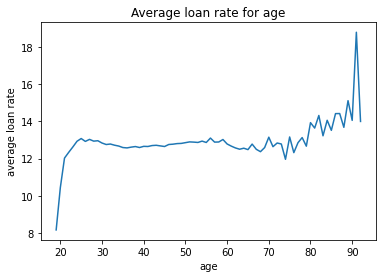

In [ ]:
#연령별 평균 대출금리

spec_loan.groupby('age')['loan_rate'].mean().plot()
plt.title('Average loan rate for age')
plt.xlabel('age')
plt.ylabel('average loan rate')
plt.show()

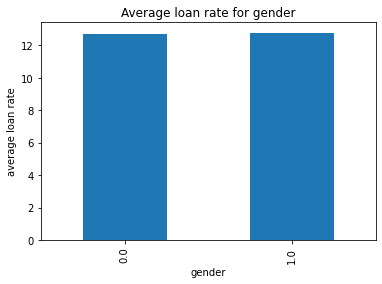

In [ ]:
#성별별 평균 대출금리

spec_loan.groupby('gender')['loan_rate'].mean().plot(kind = 'bar')
plt.title('Average loan rate for gender')
plt.xlabel('gender')
plt.ylabel('average loan rate')
plt.show()

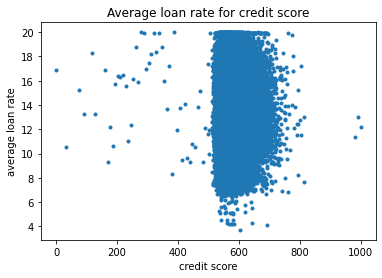

In [ ]:
#신용점수별 평균 대출금리

plt.plot(spec_loan['credit_score'].dropna().unique(), spec_loan.groupby('credit_score')['loan_rate'].mean(), '.')
plt.title('Average loan rate for credit score')
plt.xlabel('credit score')
plt.ylabel('average loan rate')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


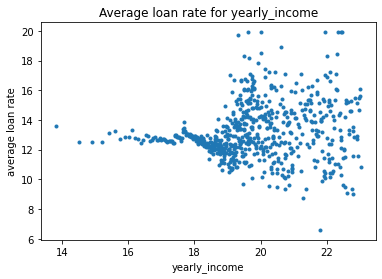

In [ ]:
#소득별 평균 대출금리

import numpy as np #numpy 라이브러리 사용

plt.plot(np.log(spec_loan['yearly_income'].sort_values().dropna().unique()), spec_loan.groupby('yearly_income')['loan_rate'].mean(), '.')
plt.title('Average loan rate for yearly_income')
plt.xlabel('yearly_income')
plt.ylabel('average loan rate')
plt.show()

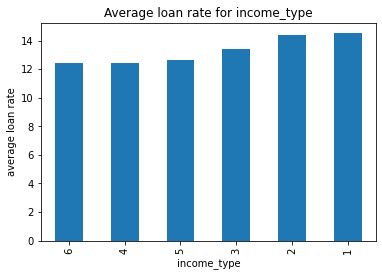

In [ ]:
#소득형태별 평균 대출금리

spec_loan.groupby('income_type')['loan_rate'].mean().sort_values().plot(kind = 'bar')
plt.title('Average loan rate for income_type')
plt.xlabel('income_type')
plt.ylabel('average loan rate')
plt.show()

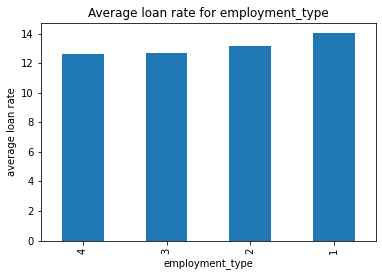

In [ ]:
#고용형태별 평균 대출금리

spec_loan.groupby('employment_type')['loan_rate'].mean().sort_values().plot(kind = 'bar');
plt.title('Average loan rate for employment_type')
plt.xlabel('employment_type')
plt.ylabel('average loan rate')
plt.show()

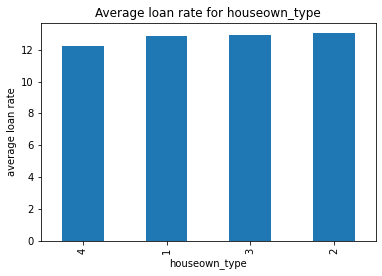

In [ ]:
#주거형태별 평균 대출금리

spec_loan.groupby('houseown_type')['loan_rate'].mean().sort_values().plot(kind = 'bar');
plt.title('Average loan rate for houseown_type')
plt.xlabel('houseown_type')
plt.ylabel('average loan rate')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


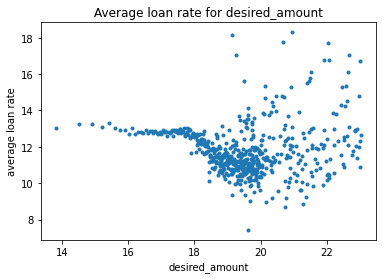

In [ ]:
#대출희망금액별 평균 대출금리

plt.plot(np.log(spec_loan['desired_amount'].sort_values().dropna().unique()), spec_loan.groupby('desired_amount')['loan_rate'].mean(), '.')
plt.title('Average loan rate for desired_amount')
plt.xlabel('desired_amount')
plt.ylabel('average loan rate')
plt.show()

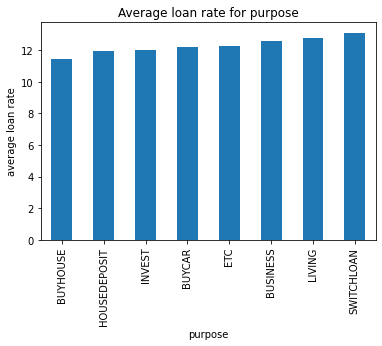

In [ ]:
#대출목적별 평균 대출금리

spec_loan.groupby('purpose')['loan_rate'].mean().sort_values().plot(kind = 'bar');
plt.title('Average loan rate for purpose')
plt.xlabel('purpose')
plt.ylabel('average loan rate')
plt.show()

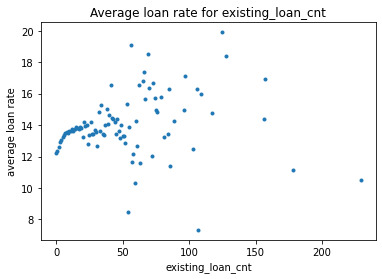

In [ ]:
#기존 대출 개수별 평균 대출금리

plt.plot(spec_loan['existing_loan_cnt'].sort_values().dropna().unique(), spec_loan.groupby('existing_loan_cnt')['loan_rate'].mean(), '.')
plt.title('Average loan rate for existing_loan_cnt')
plt.xlabel('existing_loan_cnt')
plt.ylabel('average loan rate')
plt.show()

###2.1.2. Spec 데이터와 대출한도의 상관관계

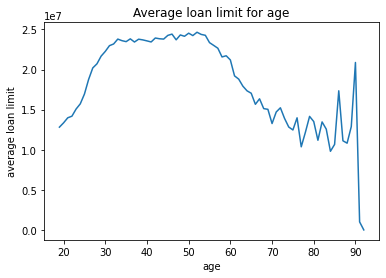

In [ ]:
#연령별 평균 대출한도

spec_loan.groupby('age')['loan_limit'].mean().plot()
plt.title('Average loan limit for age')
plt.xlabel('age')
plt.ylabel('average loan limit')
plt.show()

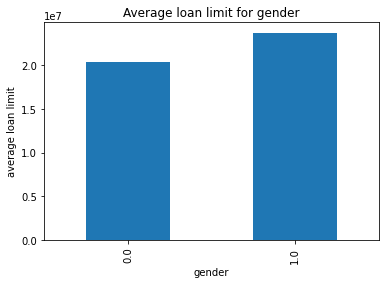

In [ ]:
#성별별 평균 대출한도

spec_loan.groupby('gender')['loan_limit'].mean().plot(kind = 'bar')
plt.title('Average loan limit for gender')
plt.xlabel('gender')
plt.ylabel('average loan limit')
plt.show()

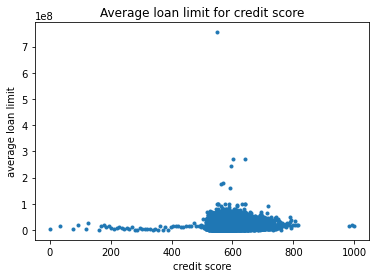

In [ ]:
#신용점수별 평균 대출한도

plt.plot(spec_loan['credit_score'].dropna().unique(), spec_loan.groupby('credit_score')['loan_limit'].mean(), '.')
plt.title('Average loan limit for credit score')
plt.xlabel('credit score')
plt.ylabel('average loan limit')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


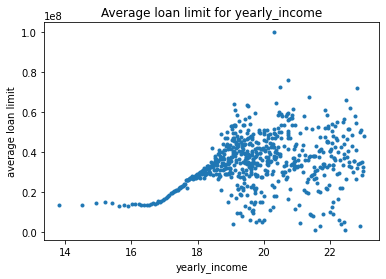

In [ ]:
#소득별 평균 대출한도

import numpy as np #numpy 라이브러리 사용

plt.plot(np.log(spec_loan['yearly_income'].sort_values().dropna().unique()), spec_loan.groupby('yearly_income')['loan_limit'].mean(), '.')
plt.title('Average loan limit for yearly_income')
plt.xlabel('yearly_income')
plt.ylabel('average loan limit')
plt.show()

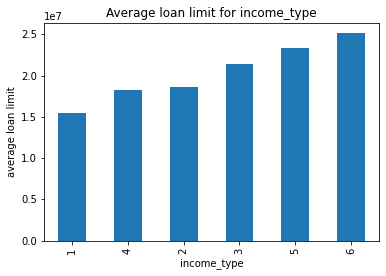

In [ ]:
#소득형태별 평균 대출한도

spec_loan.groupby('income_type')['loan_limit'].mean().sort_values().plot(kind = 'bar')
plt.title('Average loan limit for income_type')
plt.xlabel('income_type')
plt.ylabel('average loan limit')
plt.show()

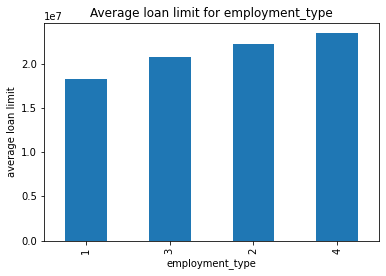

In [ ]:
#고용형태별 평균 대출한도

spec_loan.groupby('employment_type')['loan_limit'].mean().sort_values().plot(kind = 'bar');
plt.title('Average loan limit for employment_type')
plt.xlabel('employment_type')
plt.ylabel('average loan limit')
plt.show()

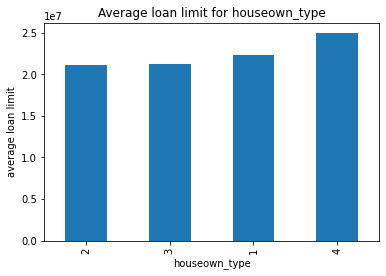

In [ ]:
#주거형태별 평균 대출한도

spec_loan.groupby('houseown_type')['loan_limit'].mean().sort_values().plot(kind = 'bar');
plt.title('Average loan limit for houseown_type')
plt.xlabel('houseown_type')
plt.ylabel('average loan limit')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


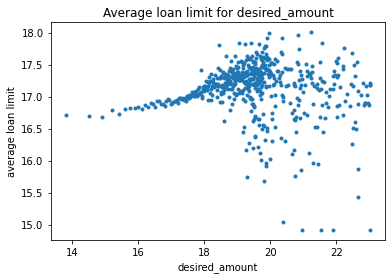

In [ ]:
#대출희망금액별 평균 대출한도

plt.plot(np.log(spec_loan['desired_amount'].sort_values().dropna().unique()), np.log(spec_loan.groupby('desired_amount')['loan_limit'].mean()), '.')
plt.title('Average loan limit for desired_amount')
plt.xlabel('desired_amount')
plt.ylabel('average loan limit')
plt.show()

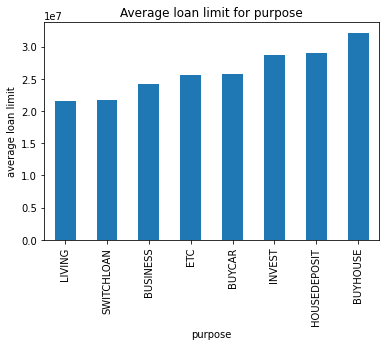

In [ ]:
#대출목적별 평균 대출한도

spec_loan.groupby('purpose')['loan_limit'].mean().sort_values().plot(kind = 'bar');
plt.title('Average loan limit for purpose')
plt.xlabel('purpose')
plt.ylabel('average loan limit')
plt.show()

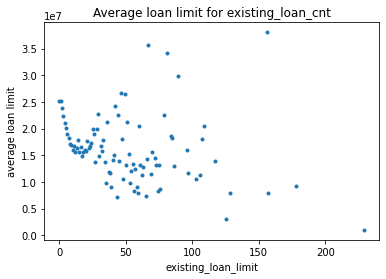

In [ ]:
#기존 대출 개수별 평균 대출한도

plt.plot(spec_loan['existing_loan_cnt'].sort_values().dropna().unique(), spec_loan.groupby('existing_loan_cnt')['loan_limit'].mean(), '.')
plt.title('Average loan limit for existing_loan_cnt')
plt.xlabel('existing_loan_limit')
plt.ylabel('average loan limit')
plt.show()

###2.1.3. Spec 데이터와 대출 신청 여부

In [ ]:
#applied_once를 기준으로 대출신청률을 알아보기
#동일한 유저가 과대반영되는 것을 막기 위하여 user_id별로 고유한 행만 남기기
spec_loan_345_user = spec_loan_345.drop_duplicates(['user_id'])
print('고유한 유저의 수 : ', len(spec_loan_345_user))

고유한 유저의 수 :  259321


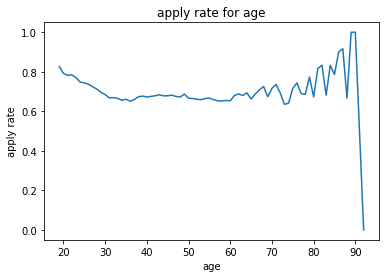

In [ ]:
#대출 신청 여부와 연령

spec_loan_345_user.groupby('age')['applied_once'].mean().plot();
plt.title('apply rate for age')
plt.xlabel('age')
plt.ylabel('apply rate')
plt.show()

Text(0, 0.5, 'apply rate')

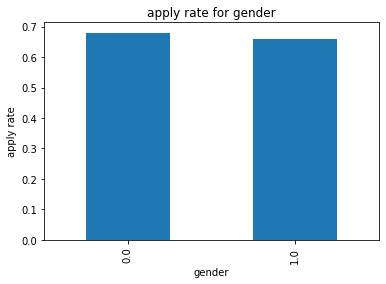

In [ ]:
#대출 신청 여부와 성별

spec_loan_345_user.groupby('applied_once')['gender'].mean().plot(kind = 'bar')
plt.title('apply rate for gender')
plt.xlabel('gender')
plt.ylabel('apply rate')

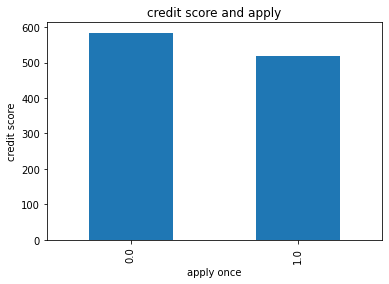

In [ ]:
#대출 신청 여부와 신용점수

spec_loan_345_user.groupby('applied_once')['credit_score'].mean().plot(kind = 'bar')
plt.title('credit score and apply')
plt.ylabel('credit score')
plt.xlabel('apply once')
plt.show()

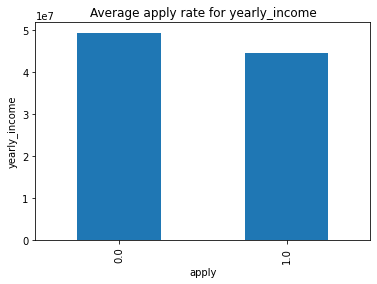

In [ ]:
#대출 신청 여부와 연 소득

import numpy as np

spec_loan_345_user.groupby('applied_once')['yearly_income'].mean().plot(kind = 'bar')
plt.title('Average apply rate for yearly_income')
plt.ylabel('yearly_income')
plt.xlabel('apply')
plt.show()

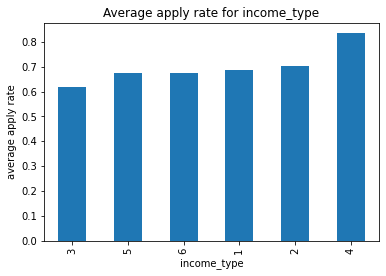

In [ ]:
#소득형태별 대출신청률

spec_loan_345_user.groupby('income_type')['applied_once'].mean().sort_values().plot(kind = 'bar');
plt.title('Average apply rate for income_type')
plt.xlabel('income_type')
plt.ylabel('average apply rate')
plt.show()

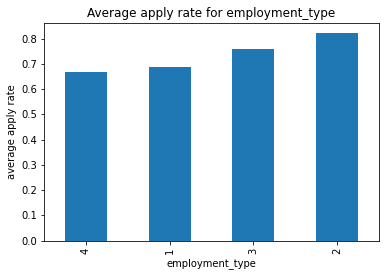

In [ ]:
#고용형태별 대출신청률

spec_loan_345_user.groupby('employment_type')['applied_once'].mean().sort_values().plot(kind = 'bar');
plt.title('Average apply rate for employment_type')
plt.xlabel('employment_type')
plt.ylabel('average apply rate')
plt.show()

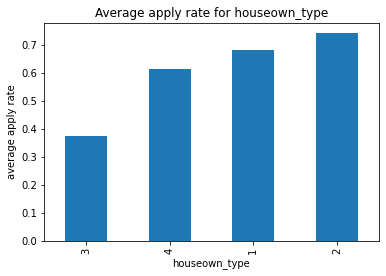

In [ ]:
#주거형태별 대출신청률

spec_loan_345_user.groupby('houseown_type')['applied_once'].mean().sort_values().plot(kind = 'bar');
plt.title('Average apply rate for houseown_type')
plt.xlabel('houseown_type')
plt.ylabel('average apply rate')
plt.show()

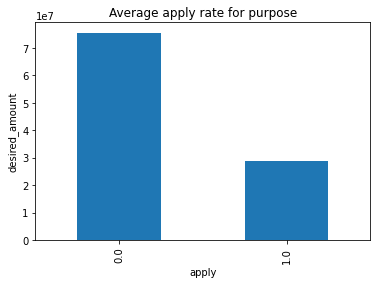

In [ ]:
#희망대출금액별 대출신청률

spec_loan_345_user.groupby('applied_once')['desired_amount'].mean().plot(kind = 'bar');
plt.title('Average apply rate for purpose')
plt.xlabel('apply')
plt.ylabel('desired_amount')
plt.show()

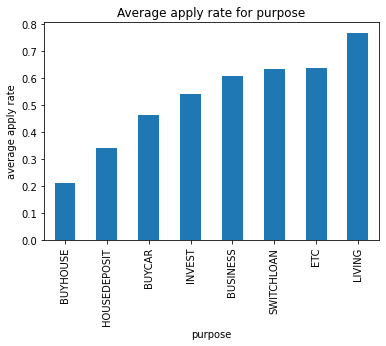

In [ ]:
#대출목적별 대출신청률

spec_loan_345_user.groupby('purpose')['applied_once'].mean().sort_values().plot(kind = 'bar');
plt.title('Average apply rate for purpose')
plt.xlabel('purpose')
plt.ylabel('average apply rate')
plt.show()

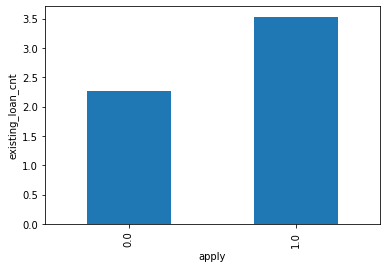

In [ ]:
#기존대출횟수과 대출신청률

spec_loan_345_user.groupby('applied_once')['existing_loan_cnt'].mean().plot(kind = 'bar')
plt.xlabel('apply')
plt.ylabel('existing_loan_cnt')
plt.show()

##2.2. Loan data 탐색

###2.2.1. 대출금리 및 대출한도의 신청여부와의 상관관계

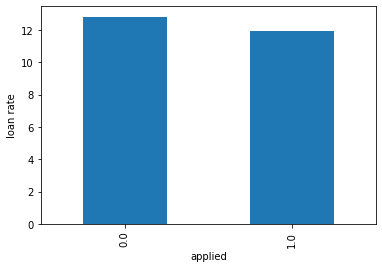

In [ ]:
#대출신청률과 대출금리

spec_loan_345.groupby('is_applied')['loan_rate'].mean().plot(kind = 'bar')
plt.xlabel('applied')
plt.ylabel('loan rate')
plt.show()

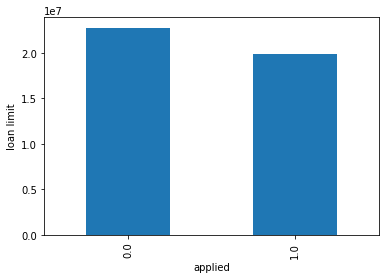

In [ ]:
#대출신청률과 대출한도

spec_loan_345.groupby('is_applied')['loan_limit'].mean().plot(kind = 'bar')
plt.xlabel('applied')
plt.ylabel('loan limit')
plt.show()

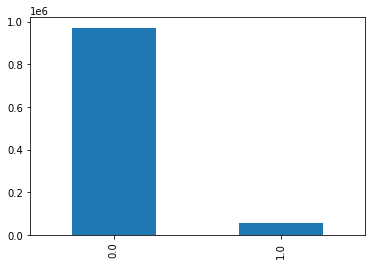

In [ ]:
(spec_loan_345['is_applied'].value_counts()/len('is_applied')).plot(kind = 'bar')

###2.2.2. 은행 및 대출상품유형별 대출 신청률

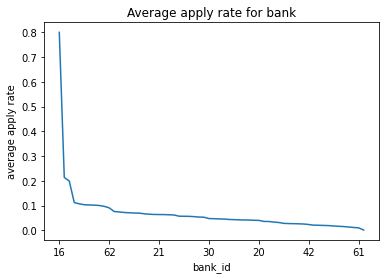

In [ ]:
#대출신청률과 은행

spec_loan_345['bank_id'] = spec_loan_345['bank_id'].astype('category')
spec_loan_345.groupby('bank_id')['is_applied'].mean().sort_values(ascending = False).plot()
plt.title('Average apply rate for bank')
plt.xlabel('bank_id')
plt.ylabel('average apply rate')
plt.show()

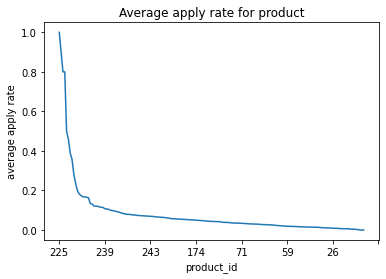

In [ ]:
#대출신청률과 대출상품

spec_loan_345['product_id'] = spec_loan_345['product_id'].astype('category')
spec_loan_345.groupby('product_id')['is_applied'].mean().sort_values(ascending = False).plot()
plt.title('Average apply rate for product')
plt.xlabel('product_id')
plt.ylabel('average apply rate')
plt.show()

##2.3. Log data 탐색

###2.3.1. 대출 신청 여부에 따른 행동별 횟수 차이

<Figure size 1152x2160 with 0 Axes>

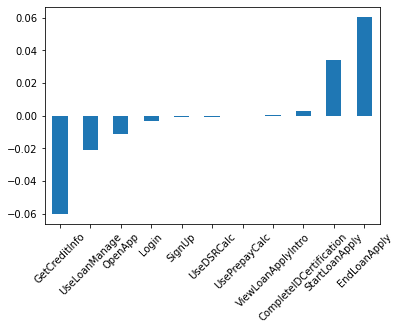

<Figure size 1152x2160 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

(log_345[log_345['applied_once'] == 1]['event'].value_counts(normalize = True).sort_index() - log_345[log_345['applied_once'] == 0]['event'].value_counts(normalize = True).sort_index()).sort_values().plot(kind = 'bar')
plt.xticks(rotation=45)
plt.figure(figsize=(16,30))

#3. 예측 모델 훈련

In [ ]:
#데이터 임포트

spec_loan_345 = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/spec_loan_345_final.csv')
log_user_345 = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/log_user_345_final.csv')

spec_loan_6 = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/spec_loan_6_final.csv')
log_user_6 = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/log_user_6_final.csv')

In [ ]:
spec_loan_345.isna().sum()

Unnamed: 0                   0
application_id               0
user_id                      0
age                      91585
gender                   91585
insert_time                  0
credit_score                 0
yearly_income                0
income_type                  0
employment_type              0
houseown_type                0
desired_amount               0
purpose                      0
existing_loan_cnt            0
loanapply_insert_time        0
bank_id                      0
product_id                   0
loan_limit                   0
loan_rate                    0
is_applied                   0
applied_once                 0
dtype: int64

In [ ]:
spec_loan_6.isna().sum()

Unnamed: 0                     0
application_id                 0
user_id                        0
age                        36453
gender                     36453
insert_time                    0
credit_score                   0
yearly_income                  0
income_type                    0
employment_type                0
houseown_type                  0
desired_amount                 0
purpose                        0
existing_loan_cnt              0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                     0
loan_rate                      0
is_applied               3255482
dtype: int64

##3.1. 인풋 변수 선택

In [ ]:
spec_loan_log_345 = pd.merge(spec_loan_345, log_user_345, left_on = ['user_id', 'applied_once'], right_on = ['user_id', 'applied_once'], how = 'left')
spec_loan_log_6 = pd.merge(spec_loan_6, log_user_6, left_on = 'user_id', right_on = 'user_id', how = 'left')

In [ ]:
#로그의 결측치, 즉 유저에 매칭되는 로그를 구할 수 없는 경우, 해당 로그의 평균으로 대체

spec_loan_log_345['CompleteIDCertification'] = spec_loan_log_345['CompleteIDCertification'].fillna(spec_loan_log_345['CompleteIDCertification'].mean())
spec_loan_log_345['EndLoanApply'] = spec_loan_log_345['EndLoanApply'].fillna(spec_loan_log_345['EndLoanApply'].mean())
spec_loan_log_345['GetCreditInfo'] = spec_loan_log_345['GetCreditInfo'].fillna(spec_loan_log_345['GetCreditInfo'].mean())
spec_loan_log_345['Login'] = spec_loan_log_345['Login'].fillna(spec_loan_log_345['Login'].mean())
spec_loan_log_345['OpenApp'] = spec_loan_log_345['OpenApp'].fillna(spec_loan_log_345['OpenApp'].mean())
spec_loan_log_345['SignUp'] = spec_loan_log_345['SignUp'].fillna(spec_loan_log_345['SignUp'].mean())
spec_loan_log_345['StartLoanApply'] = spec_loan_log_345['StartLoanApply'].fillna(spec_loan_log_345['StartLoanApply'].mean())
spec_loan_log_345['UseDSRCalc'] = spec_loan_log_345['UseDSRCalc'].fillna(spec_loan_log_345['UseDSRCalc'].mean())
spec_loan_log_345['UseLoanManage'] = spec_loan_log_345['UseLoanManage'].fillna(spec_loan_log_345['UseLoanManage'].mean())
spec_loan_log_345['UsePrepayCalc'] = spec_loan_log_345['UsePrepayCalc'].fillna(spec_loan_log_345['UsePrepayCalc'].mean())
spec_loan_log_345['ViewLoanApplyIntro'] = spec_loan_log_345['ViewLoanApplyIntro'].fillna(spec_loan_log_345['ViewLoanApplyIntro'].mean())

spec_loan_log_6['CompleteIDCertification'] = spec_loan_log_6['CompleteIDCertification'].fillna(spec_loan_log_6['CompleteIDCertification'].mean())
spec_loan_log_6['EndLoanApply'] = spec_loan_log_6['EndLoanApply'].fillna(spec_loan_log_6['EndLoanApply'].mean())
spec_loan_log_6['GetCreditInfo'] = spec_loan_log_6['GetCreditInfo'].fillna(spec_loan_log_6['GetCreditInfo'].mean())
spec_loan_log_6['Login'] = spec_loan_log_6['Login'].fillna(spec_loan_log_6['Login'].mean())
spec_loan_log_6['OpenApp'] = spec_loan_log_6['OpenApp'].fillna(spec_loan_log_6['OpenApp'].mean())
spec_loan_log_6['SignUp'] = spec_loan_log_6['SignUp'].fillna(spec_loan_log_6['SignUp'].mean())
spec_loan_log_6['StartLoanApply'] = spec_loan_log_6['StartLoanApply'].fillna(spec_loan_log_6['StartLoanApply'].mean())
spec_loan_log_6['UseDSRCalc'] = spec_loan_log_6['UseDSRCalc'].fillna(spec_loan_log_6['UseDSRCalc'].mean())
spec_loan_log_6['UseLoanManage'] = spec_loan_log_6['UseLoanManage'].fillna(spec_loan_log_6['UseLoanManage'].mean())
spec_loan_log_6['UsePrepayCalc'] = spec_loan_log_6['UsePrepayCalc'].fillna(spec_loan_log_6['UsePrepayCalc'].mean())
spec_loan_log_6['ViewLoanApplyIntro'] = spec_loan_log_6['ViewLoanApplyIntro'].fillna(spec_loan_log_6['ViewLoanApplyIntro'].mean())

In [ ]:
#연령, 성별, inser_time, loan_apply_inser_time은 제외
#연령은 결측치가 많고, 성별은 EDA 결과로 볼 때 Y와 상관이 유의하지 않을 것으로 판단

spec_loan_log_345 = spec_loan_log_345[['application_id', 'user_id', 'credit_score', 'yearly_income', 'income_type',
                            'employment_type', 'houseown_type', 'desired_amount', 'purpose', 
                            'bank_id', 'product_id', 'loan_limit', 'loan_rate', 'CompleteIDCertification', 'EndLoanApply', 'GetCreditInfo',
                            'Login', 'OpenApp', 'SignUp', 'StartLoanApply', 'UseDSRCalc',
                            'UseLoanManage', 'UsePrepayCalc', 'ViewLoanApplyIntro', 'applied_once', 'is_applied']]

spec_loan_log_6 = spec_loan_log_6[['application_id', 'user_id', 'credit_score', 'yearly_income', 'income_type',
                            'employment_type', 'houseown_type', 'desired_amount', 'purpose', 
                            'bank_id', 'product_id', 'loan_limit', 'loan_rate', 'CompleteIDCertification', 'EndLoanApply', 'GetCreditInfo',
                            'Login', 'OpenApp', 'SignUp', 'StartLoanApply', 'UseDSRCalc',
                            'UseLoanManage', 'UsePrepayCalc', 'ViewLoanApplyIntro', 'is_applied']]

###3.1.1. 대출조건 표준화

In [ ]:
#개인별 표준화된 대출 조건 구하기 위해 평균과 표준편차 계산

user_rate_mean = spec_loan_log_345.groupby('user_id')['loan_rate'].mean()
user_rate_std = spec_loan_log_345.groupby('user_id')['loan_rate'].std()
user_limit_mean = spec_loan_log_345.groupby('user_id')['loan_limit'].mean()
user_limit_std = spec_loan_log_345.groupby('user_id')['loan_limit'].std()

loan_st = pd.DataFrame()
loan_st['user_id'] = spec_loan_log_345['user_id'].unique()
loan_st = loan_st.sort_values('user_id')
loan_st['rate_mean'] = user_rate_mean.tolist()
loan_st['rate_std'] = user_rate_std.tolist()
loan_st['limit_mean'] = user_limit_mean.tolist()
loan_st['limit_std'] = user_limit_std.tolist()

In [ ]:
spec_loan_log_345 = pd.merge(spec_loan_log_345, loan_st, left_on = 'user_id', right_on = 'user_id', how = 'left')

#표준편차 결측인 경우 평균으로 대체

spec_loan_log_345['rate_std'] = spec_loan_log_345['rate_std'].fillna(spec_loan_log_345['rate_std'].mean())
spec_loan_log_345['limit_std'] = spec_loan_log_345['limit_std'].fillna(spec_loan_log_345['limit_std'].mean())

In [ ]:
#표준화 = (금리 - 평균)/표준편차

spec_loan_log_345['rate_s'] = (spec_loan_log_345['loan_rate'] - spec_loan_log_345['rate_mean'])/spec_loan_log_345['rate_std']
spec_loan_log_345['limit_s'] = (spec_loan_log_345['loan_limit'] - spec_loan_log_345['limit_mean'])/spec_loan_log_345['limit_std']

#표준화 과정에서 표준편차가 0인 경우 무한으로 발산하므로, 이 경우 평균으로 대체

spec_loan_log_345 = spec_loan_log_345.replace([np.inf, -np.inf], np.nan)
spec_loan_log_345['rate_s'] = spec_loan_log_345['rate_s'].fillna(spec_loan_log_345['rate_s'].mean())
spec_loan_log_345['limit_s'] = spec_loan_log_345['limit_s'].fillna(spec_loan_log_345['limit_s'].mean())

In [ ]:
#6월에 대해서도 위 과정 동일하게 실행

#개인별 표준화된 대출 조건 구하기 위해 평균과 표준편차 계산

user_rate_mean = spec_loan_log_6.groupby('user_id')['loan_rate'].mean()
user_rate_std = spec_loan_log_6.groupby('user_id')['loan_rate'].std()
user_limit_mean = spec_loan_log_6.groupby('user_id')['loan_limit'].mean()
user_limit_std = spec_loan_log_6.groupby('user_id')['loan_limit'].std()

loan_st = pd.DataFrame()
loan_st['user_id'] = spec_loan_log_6['user_id'].unique()
loan_st = loan_st.sort_values('user_id')
loan_st['rate_mean'] = user_rate_mean.tolist()
loan_st['rate_std'] = user_rate_std.tolist()
loan_st['limit_mean'] = user_limit_mean.tolist()
loan_st['limit_std'] = user_limit_std.tolist()

spec_loan_log_6 = pd.merge(spec_loan_log_6, loan_st, left_on = 'user_id', right_on = 'user_id', how = 'left')

#표준편차 결측인 경우 평균으로 대체

spec_loan_log_6['rate_std'] = spec_loan_log_6['rate_std'].fillna(spec_loan_log_6['rate_std'].mean())
spec_loan_log_6['limit_std'] = spec_loan_log_6['limit_std'].fillna(spec_loan_log_6['limit_std'].mean())

#표준화 = (금리 - 평균)/표준편차

spec_loan_log_6['rate_s'] = (spec_loan_log_6['loan_rate'] - spec_loan_log_6['rate_mean'])/spec_loan_log_6['rate_std']
spec_loan_log_6['limit_s'] = (spec_loan_log_6['loan_limit'] - spec_loan_log_6['limit_mean'])/spec_loan_log_6['limit_std']

#표준화 과정에서 표준편차가 0인 경우 무한으로 발산하므로, 이 경우 평균으로 대체

spec_loan_log_6 = spec_loan_log_6.replace([np.inf, -np.inf], np.nan)
spec_loan_log_6['rate_s'] = spec_loan_log_6['rate_s'].fillna(spec_loan_log_6['rate_s'].mean())
spec_loan_log_6['limit_s'] = spec_loan_log_6['limit_s'].fillna(spec_loan_log_6['limit_s'].mean())

In [ ]:
# 필요한 특성만 추리기

spec_loan_log_345 = spec_loan_log_345[['application_id', 'user_id', 'credit_score', 'yearly_income',
       'income_type', 'employment_type', 'houseown_type', 'desired_amount', 'purpose', 
       'CompleteIDCertification', 'EndLoanApply', 'GetCreditInfo', 'Login',
       'OpenApp', 'SignUp', 'StartLoanApply', 'UseDSRCalc', 'UseLoanManage',
       'UsePrepayCalc', 'ViewLoanApplyIntro', 
       'rate_s', 'limit_s', 'bank_id', 'product_id', 'applied_once', 'is_applied']]

spec_loan_log_6 = spec_loan_log_6[['application_id', 'user_id', 'credit_score', 'yearly_income',
       'income_type', 'employment_type', 'houseown_type', 'desired_amount', 'purpose', 
       'CompleteIDCertification', 'EndLoanApply', 'GetCreditInfo', 'Login',
       'OpenApp', 'SignUp', 'StartLoanApply', 'UseDSRCalc', 'UseLoanManage',
       'UsePrepayCalc', 'ViewLoanApplyIntro', 
       'rate_s', 'limit_s', 'bank_id', 'product_id', 'is_applied']]

In [ ]:
spec_loan_log_345.isna().sum()

application_id             0
user_id                    0
credit_score               0
yearly_income              0
income_type                0
employment_type            0
houseown_type              0
desired_amount             0
purpose                    0
CompleteIDCertification    0
EndLoanApply               0
GetCreditInfo              0
Login                      0
OpenApp                    0
SignUp                     0
StartLoanApply             0
UseDSRCalc                 0
UseLoanManage              0
UsePrepayCalc              0
ViewLoanApplyIntro         0
rate_s                     0
limit_s                    0
bank_id                    0
product_id                 0
applied_once               0
is_applied                 0
dtype: int64

In [ ]:
spec_loan_log_6.isna().sum()

application_id                   0
user_id                          0
credit_score                     0
yearly_income                    0
income_type                      0
employment_type                  0
houseown_type                    0
desired_amount                   0
purpose                          0
CompleteIDCertification          0
EndLoanApply                     0
GetCreditInfo                    0
Login                            0
OpenApp                          0
SignUp                           0
StartLoanApply                   0
UseDSRCalc                       0
UseLoanManage                    0
UsePrepayCalc                    0
ViewLoanApplyIntro               0
rate_s                           0
limit_s                          0
bank_id                          0
product_id                       0
is_applied                 3255482
dtype: int64

In [ ]:
#데이터 저장

#spec_loan_log_345.to_csv('spec_loan_log_345.csv', index = False)
#spec_loan_log_6.to_csv('spec_loan_log_6.csv', index = False)

##3.2. train set과 test set의 분리

In [ ]:
spec_loan_log_345 = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/spec_loan_log_345.csv')

In [ ]:
spec_loan_log_345

,application_id,user_id,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,CompleteIDCertification,...,UseDSRCalc,UseLoanManage,UsePrepayCalc,ViewLoanApplyIntro,rate_s,limit_s,bank_id,product_id,applied_once,is_applied
0,2157865,346970.0,405.463757,32000000.0,5,4,4,10000000.0,LIVING,5.0,...,0.0,5.0,0.0,5.0,0.000000,0.000000,54,235,1.0,1.0
1,576643,545882.0,439.252403,72000000.0,5,4,1,20000000.0,LIVING,10.0,...,0.0,0.0,0.0,12.0,-0.839169,0.201376,54,235,1.0,0.0
2,576643,545882.0,439.252403,72000000.0,5,4,1,20000000.0,LIVING,10.0,...,0.0,0.0,0.0,12.0,1.098706,-0.872630,11,118,1.0,0.0
3,2136706,558819.0,574.406989,39000000.0,5,4,1,80000000.0,SWITCHLOAN,3.0,...,0.0,11.0,0.0,7.0,-0.072663,-0.900962,42,216,1.0,0.0
4,2136706,558819.0,574.406989,39000000.0,5,4,1,80000000.0,SWITCHLOAN,3.0,...,0.0,11.0,0.0,7.0,0.744371,-0.049490,25,169,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264381,1969227,109899.0,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,21.0,...,0.0,6.0,0.0,28.0,-0.623897,2.437460,2,7,1.0,0.0
10264382,1969227,109899.0,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,21.0,...,0.0,6.0,0.0,28.0,-0.260279,0.050401,33,110,1.0,0.0
10264383,1969227,109899.0,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,21.0,...,0.0,6.0,0.0,28.0,-1.714752,-0.631616,50,142,1.0,0.0
10264384,1969227,109899.0,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,21.0,...,0.0,6.0,0.0,28.0,0.148792,-0.517947,22,100,1.0,0.0


In [ ]:
#사용할 특성 추출
#X에는 특성들을 포함하고 is_applied는 빼준다
#Y에는 is_applied는 넣어준다

X = spec_loan_log_345[['application_id', 'user_id', 'credit_score', 'yearly_income',
       'income_type', 'employment_type', 'houseown_type', 'desired_amount', 'purpose', 
       'CompleteIDCertification', 'EndLoanApply', 'GetCreditInfo', 'Login',
       'OpenApp', 'SignUp', 'StartLoanApply', 'UseDSRCalc', 'UseLoanManage',
       'UsePrepayCalc', 'ViewLoanApplyIntro', 
       'rate_s', 'limit_s', 'bank_id', 'product_id', 'applied_once']]
Y = spec_loan_log_345['is_applied']

#train, test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [ ]:
#훈련이 두 가지 확률을 분리해서 계산하므로, 다음의 과정이 필요함

X_train['is_applied'] = y_train
X_test['is_applied'] = y_test

##3.3. 모델링 전 추가 전처리

###3.3.1. 은행별 및 대출상품별 신청률 변수 추가

In [ ]:
#train set 내에서 은행별 신청률

bank_applied = pd.DataFrame(X_train.groupby('bank_id')['is_applied'].mean().sort_values())

In [ ]:
#빈도수가 너무 적은 은행의 경우 신청률을 평균 신청률로 대체(100 미만)

print(X_train['bank_id'].value_counts())
bank_applied.loc[16, 'is_applied'] = bank_applied['is_applied'].mean()
bank_applied = bank_applied.rename(columns={'is_applied' : 'bank_applied'}) #기존 is_applied와 구분하는 이름 짓기

35    480809
38    393302
59    301312
33    263085
49    253263
       ...  
60     24487
2      23554
39      5556
9       3183
16         5
Name: bank_id, Length: 62, dtype: int64


In [ ]:
#트레인셋과 테스트셋에 트레인셋의 bank별 신청률을 bank_applied 칼럼으로 추가

X_train = pd.merge(X_train, bank_applied, left_on = 'bank_id', right_on = 'bank_id', how = 'left')
X_test = pd.merge(X_test, bank_applied, left_on = 'bank_id', right_on = 'bank_id', how = 'left')

In [ ]:
#train set 내에서 대출상품별 신청률

product_applied = pd.DataFrame(X_train.groupby('product_id')['is_applied'].mean().sort_values())

In [ ]:
#빈도수가 너무 적은 대출상품의 경우 신청률을 평균 신청률로 대체(100 미만)

print(X_train['product_id'].value_counts()[150:])
product_applied.loc[[93, 46, 166, 190, 238, 55, 240, 211], 'is_applied'] = product_applied['is_applied'].mean()
product_applied = product_applied.rename(columns={'is_applied' : 'product_applied'}) #기존 is_applied와 구분하는 이름 짓기

250    982
79     738
252    498
162    427
82     378
161    293
147    231
126    224
146    159
93      84
46      16
166     10
238      5
190      4
55       2
211      1
240      1
Name: product_id, dtype: int64


In [ ]:
#트레인셋과 테스트셋에 트레인셋의 product별 신청률을 product_applied 칼럼으로 추가

X_train = pd.merge(X_train, product_applied, left_on = 'product_id', right_on = 'product_id', how = 'left')
X_test = pd.merge(X_test, product_applied, left_on = 'product_id', right_on = 'product_id', how = 'left')

In [ ]:
X_test['product_applied'] = X_test['product_applied'].fillna(X_test['product_applied'].mean())

###3.3.2. 3~5월의 전체 은행별 대출상품별 신청률 계산하여 6월 데이터로 매칭

In [ ]:
#train set 내에서 은행별 신청률

X['is_applied'] = Y
bank_applied = pd.DataFrame(X.groupby('bank_id')['is_applied'].mean().sort_values())

In [ ]:
#빈도수가 너무 적은 은행의 경우 신청률을 평균 신청률로 대체(100 미만)

print(X['bank_id'].value_counts())
bank_applied.loc[16, 'is_applied'] = bank_applied['is_applied'].mean()
bank_applied = bank_applied.rename(columns={'is_applied' : 'bank_applied'}) #기존 is_applied와 구분하는 이름 짓기

35    601000
38    491433
59    376950
33    328537
49    316303
       ...  
60     30613
2      29489
39      6919
9       3982
16         5
Name: bank_id, Length: 62, dtype: int64


In [ ]:
#트레인셋과 테스트셋에 트레인셋의 bank별 신청률을 bank_applied 칼럼으로 추가

X = pd.merge(X, bank_applied, left_on = 'bank_id', right_on = 'bank_id', how = 'left')

In [ ]:
#train set 내에서 대출상품별 신청률

product_applied = pd.DataFrame(X.groupby('product_id')['is_applied'].mean().sort_values())

In [ ]:
#빈도수가 너무 적은 대출상품의 경우 신청률을 평균 신청률로 대체(100 미만)

print(X['product_id'].value_counts()[150:])
product_applied.loc[[46, 166, 190, 238, 55, 240, 211, 225], 'is_applied'] = product_applied['is_applied'].mean()
product_applied = product_applied.rename(columns={'is_applied' : 'product_applied'}) #기존 is_applied와 구분하는 이름 짓기

250    1247
79      947
252     636
162     533
82      485
161     370
126     298
147     291
146     197
93      107
46       20
166      11
190       5
238       5
55        2
240       1
211       1
225       1
Name: product_id, dtype: int64


In [ ]:
#트레인셋과 테스트셋에 트레인셋의 product별 신청률을 product_applied 칼럼으로 추가

X = pd.merge(X, product_applied, left_on = 'product_id', right_on = 'product_id', how = 'left')

In [ ]:
X

,application_id,user_id,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,CompleteIDCertification,...,UsePrepayCalc,ViewLoanApplyIntro,rate_s,limit_s,bank_id,product_id,applied_once,is_applied,bank_applied,product_applied
0,2157865,346970.0,405.463757,32000000.0,5,4,4,10000000.0,LIVING,5.0,...,0.0,5.0,0.000000,0.000000,54,235,1.0,1.0,0.042501,0.050284
1,576643,545882.0,439.252403,72000000.0,5,4,1,20000000.0,LIVING,10.0,...,0.0,12.0,-0.839169,0.201376,54,235,1.0,0.0,0.042501,0.050284
2,576643,545882.0,439.252403,72000000.0,5,4,1,20000000.0,LIVING,10.0,...,0.0,12.0,1.098706,-0.872630,11,118,1.0,0.0,0.016988,0.016116
3,2136706,558819.0,574.406989,39000000.0,5,4,1,80000000.0,SWITCHLOAN,3.0,...,0.0,7.0,-0.072663,-0.900962,42,216,1.0,0.0,0.024209,0.028443
4,2136706,558819.0,574.406989,39000000.0,5,4,1,80000000.0,SWITCHLOAN,3.0,...,0.0,7.0,0.744371,-0.049490,25,169,1.0,0.0,0.021180,0.035277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264381,1969227,109899.0,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,21.0,...,0.0,28.0,-0.623897,2.437460,2,7,1.0,0.0,0.097596,0.093935
10264382,1969227,109899.0,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,21.0,...,0.0,28.0,-0.260279,0.050401,33,110,1.0,0.0,0.042242,0.037856
10264383,1969227,109899.0,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,21.0,...,0.0,28.0,-1.714752,-0.631616,50,142,1.0,0.0,0.064755,0.064755
10264384,1969227,109899.0,456.146726,37000000.0,5,4,4,20000000.0,SWITCHLOAN,21.0,...,0.0,28.0,0.148792,-0.517947,22,100,1.0,0.0,0.026933,0.006692


In [ ]:
#X.to_csv('train_data_final.csv', index = False)

In [ ]:
spec_loan_log_6 = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/spec_loan_log_6.csv')

In [ ]:
spec_loan_log_6

,application_id,user_id,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,CompleteIDCertification,...,StartLoanApply,UseDSRCalc,UseLoanManage,UsePrepayCalc,ViewLoanApplyIntro,rate_s,limit_s,bank_id,product_id,is_applied
0,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,18.0,0.0,0.0,0.0,10.0,-0.148554,1.963431,7,191,NaN
1,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,18.0,0.0,0.0,0.0,10.0,1.058626,0.353206,25,169,NaN
2,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,18.0,0.0,0.0,0.0,10.0,1.227070,0.353206,2,7,NaN
3,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,18.0,0.0,0.0,0.0,10.0,-0.934624,0.800491,4,268,NaN
4,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,18.0,0.0,0.0,0.0,10.0,0.637517,-1.346475,11,118,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255477,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,4.0,0.0,2.0,0.0,3.0,0.695866,-1.378631,62,200,NaN
3255478,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,4.0,0.0,2.0,0.0,3.0,-0.129615,1.084336,2,7,NaN
3255479,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,4.0,0.0,2.0,0.0,3.0,-1.395352,-0.579831,32,257,NaN
3255480,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,4.0,0.0,2.0,0.0,3.0,0.338158,1.350603,33,110,NaN


In [ ]:
spec_loan_log_6.isna().sum()

application_id                   0
user_id                          0
credit_score                     0
yearly_income                    0
income_type                      0
employment_type                  0
houseown_type                    0
desired_amount                   0
purpose                          0
CompleteIDCertification          0
EndLoanApply                     0
GetCreditInfo                    0
Login                            0
OpenApp                          0
SignUp                           0
StartLoanApply                   0
UseDSRCalc                       0
UseLoanManage                    0
UsePrepayCalc                    0
ViewLoanApplyIntro               0
rate_s                           0
limit_s                          0
bank_id                          0
product_id                       0
is_applied                 3255482
dtype: int64

In [ ]:
spec_loan_log_6 = pd.merge(spec_loan_log_6, bank_applied, left_on = 'bank_id', right_on = 'bank_id', how = 'left')
spec_loan_log_6 = pd.merge(spec_loan_log_6, product_applied, left_on = 'product_id', right_on = 'product_id', how = 'left')
spec_loan_log_6

,application_id,user_id,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,CompleteIDCertification,...,UseLoanManage,UsePrepayCalc,ViewLoanApplyIntro,rate_s,limit_s,bank_id,product_id,is_applied,bank_applied,product_applied
0,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,0.0,0.0,10.0,-0.148554,1.963431,7,191,NaN,0.103032,0.114031
1,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,0.0,0.0,10.0,1.058626,0.353206,25,169,NaN,0.021180,0.035277
2,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,0.0,0.0,10.0,1.227070,0.353206,2,7,NaN,0.097596,0.093935
3,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,0.0,0.0,10.0,-0.934624,0.800491,4,268,NaN,0.199582,0.167558
4,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,0.0,0.0,10.0,0.637517,-1.346475,11,118,NaN,0.016988,0.016116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255477,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,2.0,0.0,3.0,0.695866,-1.378631,62,200,NaN,0.091395,0.116528
3255478,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,2.0,0.0,3.0,-0.129615,1.084336,2,7,NaN,0.097596,0.093935
3255479,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,2.0,0.0,3.0,-1.395352,-0.579831,32,257,NaN,0.026144,0.018052
3255480,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,2.0,0.0,3.0,0.338158,1.350603,33,110,NaN,0.042242,0.037856


In [ ]:
spec_loan_log_6['bank_applied'] = spec_loan_log_6['bank_applied'].fillna(spec_loan_log_6['bank_applied'].mean())
spec_loan_log_6['product_applied'] = spec_loan_log_6['product_applied'].fillna(spec_loan_log_6['product_applied'].mean())

In [ ]:
spec_loan_log_6.isna().sum()

application_id                   0
user_id                          0
credit_score                     0
yearly_income                    0
income_type                      0
employment_type                  0
houseown_type                    0
desired_amount                   0
purpose                          0
CompleteIDCertification          0
EndLoanApply                     0
GetCreditInfo                    0
Login                            0
OpenApp                          0
SignUp                           0
StartLoanApply                   0
UseDSRCalc                       0
UseLoanManage                    0
UsePrepayCalc                    0
ViewLoanApplyIntro               0
rate_s                           0
limit_s                          0
bank_id                          0
product_id                       0
is_applied                 3255482
bank_applied                     0
product_applied                  0
dtype: int64

In [ ]:
#spec_loan_log_6.to_csv('test_data_final.csv', index = False)

##3.4. 상품 예측 훈련

In [ ]:
#대출을 신청한 유저들이 어떤 상품을 신청하는지 예측하는 훈련이므로, 대출 신청한 유저들 대상으로만 훈련

X_train_loan = X_train[X_train['applied_once'] == 1]
y_train_loan = X_train_loan['is_applied']
len(X_train_loan) == len(y_train_loan)

True

In [ ]:
#상품 예측 훈련의 변수는 다음의 4가지 특성

X_train_loan = X_train_loan[['limit_s', 'rate_s', 'bank_applied', 'product_applied']]

In [ ]:
RF_loan = RandomForestClassifier(n_estimators = 6)
RF_loan.fit(X_train_loan, y_train_loan)
# joblib.dump(RF_loan, 'RF_loan.pkl')

RandomForestClassifier(n_estimators=6)

In [ ]:
# rfc_loan = joblib.load('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/oversampling_please_RF_loan.pkl')
# RF_loan = rfc_loan

##3.5. 유저 예측 훈련

In [ ]:
#유저 예측의 변수는 다음의 특성들을 사용

X_train_user = X_train[['credit_score', 'yearly_income',
       'income_type', 'employment_type', 'houseown_type', 'desired_amount',
       'purpose', 'CompleteIDCertification', 'EndLoanApply', 'GetCreditInfo', 'Login',
       'OpenApp', 'SignUp', 'StartLoanApply', 'UseDSRCalc', 'UseLoanManage',
       'UsePrepayCalc', 'ViewLoanApplyIntro']]

Y_train_user = X_train['applied_once']

In [ ]:
#범주형 변수의 더미변수화

X_train_user['income_type'] = X_train_user['income_type'].astype(str)
X_train_user['employment_type'] = X_train_user['employment_type'].astype(str)
X_train_user['houseown_type'] = X_train_user['houseown_type'].astype(str)
X_train_user = pd.get_dummies(X_train_user, columns = ['income_type', 'employment_type', 'houseown_type', 'purpose'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
RF_user = RandomForestClassifier()
RF_user.fit(X_train_user, Y_train_user)
# joblib.dump('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/ch_final_user.pkl')

In [ ]:
 rfc_user = joblib.load('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/ch_final_user.pkl')
 RF_user = rfc_user

#4. 예측 모델 평가 (3,4,5월에 대해)

##4.1. 유저가 대출을 받을 확률


In [ ]:
#유저 예측 모형의 변수들 선택

X_test_user = X_test[['credit_score', 'yearly_income',
       'income_type', 'employment_type', 'houseown_type', 'desired_amount',
       'purpose']]

#범주형 변수의 더미변수화

X_test_user['income_type'] = X_test_user['income_type'].astype(str)
X_test_user['employment_type'] = X_test_user['employment_type'].astype(str)
X_test_user['houseown_type'] = X_test_user['houseown_type'].astype(str)
X_test_user = pd.get_dummies(X_test_user, columns = ['income_type', 'employment_type', 'houseown_type', 'purpose'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
y_pred_user = RF_user.predict_proba(X_test_user)

## 4.2. 유저가 대출을 받을 때 상품이 선택될 확률

In [ ]:
#상품 예측 모형의 변수들 선택

X_test_loan = X_test[['limit_s', 'rate_s', 'bank_applied', 'product_applied']]

In [ ]:
y_pred_loan = RF_loan.predict_proba(X_test_loan)

##4.3. 최종 예측과 성능

###4.3.1. 최적 threshold 선택 

In [ ]:
y_pred_prob = y_pred_user[:,1] * y_pred_loan[:,1] #두 확률의 곱이 최종 예측 확률

In [ ]:
candidate_threshold = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]

In [ ]:
list_accuracy_score =[]
list_precision_score=[]
list_recall_score = [] 
list_f1_score= [] 
for threshold in candidate_threshold:
  y_pred = [] 
  y_pred = np.where(y_pred_prob>threshold, 1,0)
  print('--------threshold is {} ------'.format(threshold))
  print('accuracy : ', accuracy_score(y_test, y_pred))
  print('precision : ',precision_score(y_test, y_pred))
  print('recall : ',recall_score(y_test, y_pred))
  print('f1_score : ',f1_score(y_test, y_pred))
  list_accuracy_score.append(accuracy_score(y_test, y_pred))
  list_precision_score.append(precision_score(y_test, y_pred))
  list_recall_score.append(recall_score(y_test, y_pred))
  list_f1_score.append(f1_score(y_test, y_pred))
  print('')
  print('confusion matrix of model')
  print(confusion_matrix(y_test, y_pred)/len(y_test))
  print('')
  print('------------------------------- \n')

--------threshold is 0.1 ------
accuracy :  0.8379996278395502
precision :  0.174189644841806
recall :  0.5356829944630614
f1_score :  0.26289344140573917

confusion matrix of model
[[0.80911043 0.13695992]
 [0.02504046 0.0288892 ]]

------------------------------- 

--------threshold is 0.15 ------
accuracy :  0.8662351099285978
precision :  0.1958045332719592
recall :  0.4764386555988113
f1_score :  0.27754494247521033

confusion matrix of model
[[0.84054094 0.10552941]
 [0.02823548 0.02569417]]

------------------------------- 

--------threshold is 0.2 ------
accuracy :  0.900782706035137
precision :  0.24246252036033641
recall :  0.39529947340372684
f1_score :  0.3005676335552816

confusion matrix of model
[[0.87946434 0.066606  ]
 [0.03261129 0.02131836]]

------------------------------- 

--------threshold is 0.25 ------
accuracy :  0.9099922158062973
precision :  0.25905056866980714
recall :  0.35962099520372864
f1_score :  0.3011614845519907

confusion matrix of model
[[0.8905

Text(0.5, 1.0, 'recall by threshold')

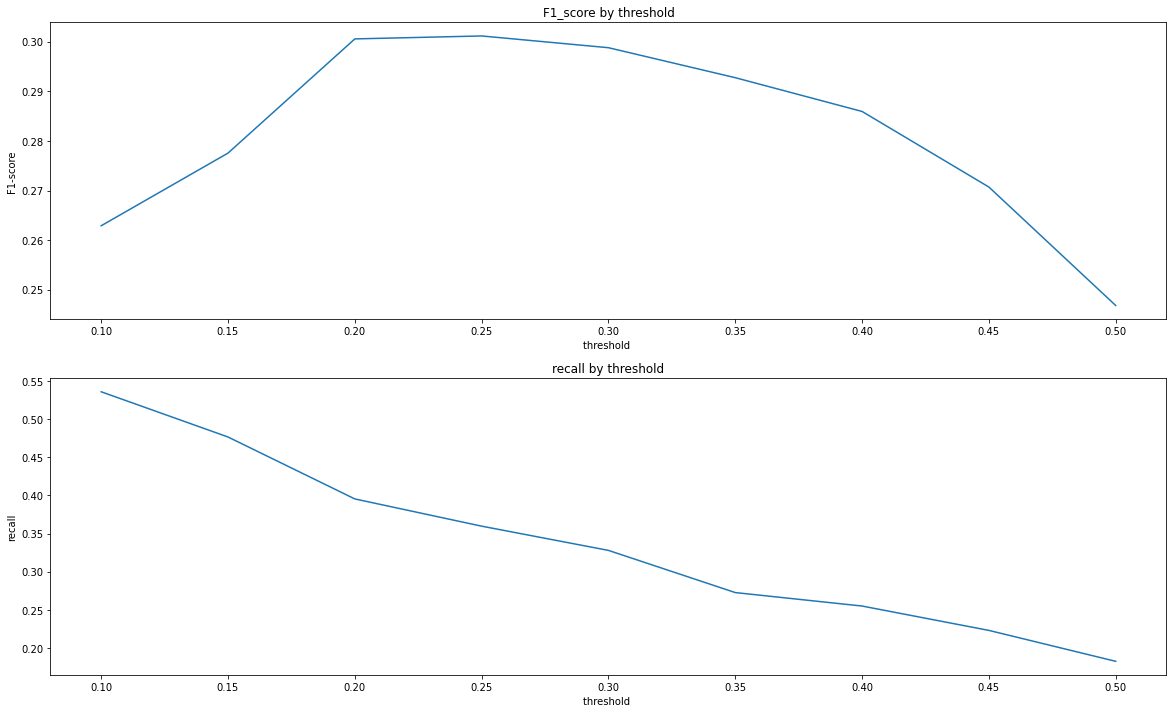

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)

plt.plot(candidate_threshold, list_f1_score)
plt.xlabel('threshold ')
plt.ylabel('F1-score')
plt.title('F1_score by threshold')
plt.subplot(2,1,2)

plt.plot(candidate_threshold, list_recall_score)
plt.xlabel('threshold ')
plt.ylabel('recall')
plt.title('recall by threshold')

# recall은 지속 감소하고, f1 score은 최대화되는 0.3에서 최적 threshold 선택 

###4.3.2. 랜덤 포레스트 변수 중요도 시각화 

In [ ]:
a = RF_loan.feature_importances_
b = ['l_limit', 'l_rate', 'bank_app', 'product_app']

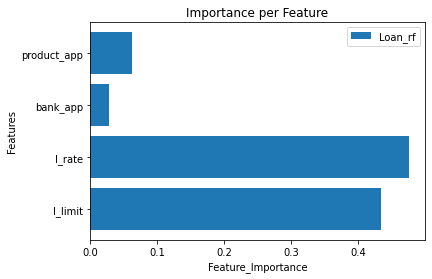

In [ ]:
plt.barh(['l_limit', 'l_rate', 'bank_app', 'product_app'],
a, align='center', label="Loan_rf")
plt.legend()

plt.ylabel('Features')
plt.xlabel('Feature_Importance')
plt.title('Importance per Feature')

plt.show()

In [ ]:
a = RF_user.feature_importances_

In [ ]:
feature_scores = pd.Series(RF_user.feature_importances_, index=['credit_score', 'yearly_income', 'desired_amount', 'income_type_1',
       'income_type_2', 'income_type_3', 'income_type_4', 'income_type_5',
       'income_type_6', 'employment_type_1', 'employment_type_2',
       'employment_type_3', 'employment_type_4', 'houseown_type_1',
       'houseown_type_2', 'houseown_type_3', 'houseown_type_4',
       'purpose_BUSINESS', 'purpose_BUYCAaR', 'purpose_BUYHOUSE', 'purpose_ETC',
       'purpose_HOUSEDEPOSIT', 'purpose_INVEST', 'purpose_LIVING',
       'purpose_SWITCHLOAN']).sort_values(ascending=False)

In [ ]:
feature_scores['purpose']= feature_scores['purpose_LIVING']+feature_scores['purpose_HOUSEDEPOSIT']+feature_scores['purpose_SWITCHLOAN']+feature_scores['purpose_BUSINESS']+feature_scores['purpose_BUSINESS']+feature_scores['purpose_BUYCAaR']+feature_scores['purpose_ETC']
feature_scores['houseown_type'] =feature_scores['houseown_type_1']+feature_scores['houseown_type_2']+feature_scores['houseown_type_3']+feature_scores['houseown_type_4']
feature_scores['employment_type']= feature_scores['employment_type_1']+feature_scores['employment_type_2']+feature_scores['employment_type_3']+feature_scores['employment_type_4']
feature_scores['income_type']= feature_scores['income_type_1']+feature_scores['income_type_2']+feature_scores['income_type_3']+feature_scores['income_type_4']+feature_scores['income_type_5']+feature_scores['income_type_6']
feature_scores.drop(index=['income_type_1','income_type_2','income_type_3','income_type_4','income_type_5','income_type_6','employment_type_1','employment_type_2','employment_type_3','employment_type_4','houseown_type_1','houseown_type_2','houseown_type_3','houseown_type_4','purpose_BUYHOUSE','purpose_BUSINESS','purpose_LIVING','purpose_HOUSEDEPOSIT','purpose_SWITCHLOAN','purpose_INVEST','purpose_BUYCAaR','purpose_ETC'],inplace=True)

<BarContainer object of 7 artists>

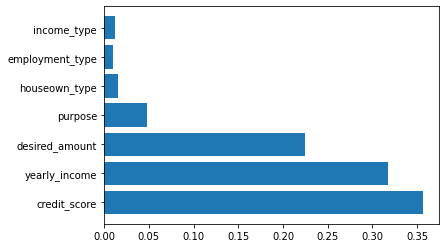

In [ ]:
plt.barh(feature_scores.index,feature_scores)  

#5. 6월 데이터 예측

##5.1. 3~5월 데이터 전체에 대하여 훈련

In [ ]:
#데이터 임포트

data_345 = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/train_data_final.csv')
data_6 = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/test_data_final.csv')

In [ ]:
data_6

,application_id,user_id,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,CompleteIDCertification,...,UseLoanManage,UsePrepayCalc,ViewLoanApplyIntro,rate_s,limit_s,bank_id,product_id,is_applied,bank_applied,product_applied
0,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,0.0,0.0,10.0,-0.148554,1.963431,7,191,NaN,0.103032,0.114031
1,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,0.0,0.0,10.0,1.058626,0.353206,25,169,NaN,0.021180,0.035277
2,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,0.0,0.0,10.0,1.227070,0.353206,2,7,NaN,0.097596,0.093935
3,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,0.0,0.0,10.0,-0.934624,0.800491,4,268,NaN,0.199582,0.167558
4,1748340,430982.0,473.041049,24000000.0,5,4,4,25000000.0,SWITCHLOAN,9.0,...,0.0,0.0,10.0,0.637517,-1.346475,11,118,NaN,0.016988,0.016116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255477,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,2.0,0.0,3.0,0.695866,-1.378631,62,200,NaN,0.091395,0.116528
3255478,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,2.0,0.0,3.0,-0.129615,1.084336,2,7,NaN,0.097596,0.093935
3255479,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,2.0,0.0,3.0,-1.395352,-0.579831,32,257,NaN,0.026144,0.018052
3255480,1428218,478802.0,464.593888,45000000.0,5,4,2,50000000.0,SWITCHLOAN,3.0,...,2.0,0.0,3.0,0.338158,1.350603,33,110,NaN,0.042242,0.037856


##5.2. 유저 예측 훈련

In [ ]:
#유저 예측의 변수는 다음의 특성들을 사용

X_train_user = data_345[['credit_score', 'yearly_income', 'income_type', 'employment_type', 'houseown_type', 'desired_amount', 'purpose']]
Y_train_user = data_345['applied_once']

#6월 데이터의 인풋 변수 정리
X_test_user = data_6[['credit_score', 'yearly_income', 'income_type', 'employment_type', 'houseown_type', 'desired_amount', 'purpose']]

In [ ]:
#범주형 변수들의 더미변수화

X_train_user['income_type'] = X_train_user['income_type'].astype(str)
X_train_user['employment_type'] = X_train_user['employment_type'].astype(str)
X_train_user['houseown_type'] = X_train_user['houseown_type'].astype(str)
X_train_user = pd.get_dummies(X_train_user, columns = ['income_type', 'employment_type', 'houseown_type', 'purpose'])

X_test_user['income_type'] = X_test_user['income_type'].astype(str)
X_test_user['employment_type'] = X_test_user['employment_type'].astype(str)
X_test_user['houseown_type'] = X_test_user['houseown_type'].astype(str)
X_test_user = pd.get_dummies(X_test_user, columns = ['income_type', 'employment_type', 'houseown_type', 'purpose'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
#유저 예측 훈련

RF_user = RandomForestClassifier(n_estimators = 6)
RF_user.fit(X_train_user, Y_train_user)
# joblib.dump(RF_user,'/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/real_final_user.pkl')

RandomForestClassifier(n_estimators=6)

In [ ]:
# rfc_user = joblib.load('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/real_final_user.pkl')
# RF_user = rfc_user

##5.3. 상품 예측 훈련

In [ ]:
#대출을 신청한 유저들이 어떤 상품을 신청하는지 예측하는 훈련이므로, 대출 신청한 유저들 대상으로만 훈련

X_train_loan = data_345[data_345['applied_once'] == 1]
y_train_loan = X_train_loan['is_applied']

In [ ]:
#상품 예측 훈련의 변수는 다음의 4가지 특성

X_train_loan = X_train_loan[['limit_s', 'rate_s', 'bank_applied', 'product_applied']]

#6월 데이터 인풋 변수 정리
X_test_loan = data_6[['limit_s', 'rate_s', 'bank_applied', 'product_applied']]

In [ ]:
# 모델설정
sm = ADASYN(n_neighbors=5)

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X_train_loan,list(y_train_loan))

print(Counter(y_train_loan))
print(Counter(y_resampled))

Counter({0.0: 7072049, 1.0: 554711})
Counter({0.0: 7072049, 1.0: 6994976})


In [ ]:
RF_loan = RandomForestClassifier(n_estimators = 6)
RF_loan.fit(X_resampled, y_resampled)
# joblib.dump(RF_loan,'/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/oversampling_realfinal2_RF_loan.pkl')

RandomForestClassifier(n_estimators=6)

In [ ]:
# rfc_loan = joblib.load('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/oversampling_realfinal2_RF_loan.pkl')
# RF_loan = rfc_loan

##5.4. 예측값 산출

In [ ]:
user_pred = RF_user.predict_proba(X_test_user)
loan_pred = RF_loan.predict_proba(X_test_loan)

In [ ]:
user_pred = user_pred[:,1]
loan_pred = loan_pred[:,1]
final_pred = user_pred * loan_pred
final_pred = np.where(final_pred > 0.3, 1, 0) #0.3을 넘으면 대출한 것으로 분류

In [ ]:
final_pred.mean() #모델의 예측값 분포

0.14038535614695458

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/Modeling Project 2022/제출할 것만 최종정리/찐찐막/평가데이터(루키부문,퓨처스부문)_수정_221011/데이터분석분야_퓨처스부문_평가데이터.csv')

In [ ]:
submit = submit[['application_id', 'product_id']]
submit

,application_id,product_id
0,4,220
1,4,191
2,8,29
3,8,159
4,8,85
...,...,...
3255189,2167778,258
3255190,2167791,29
3255191,2167822,149
3255192,2167822,157


In [ ]:
submit_temp = data_6[['application_id', 'product_id', 'is_applied']]
submit_temp['is_applied'] = final_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
submit_final = pd.merge(submit, submit_temp, left_on = ['application_id', 'product_id'], right_on = ['application_id', 'product_id'], how = 'left')

In [ ]:
submit_final['is_applied'].mean()

0.14037780851156645

In [ ]:
submit_final.to_csv('데이터분석분야_퓨처스부문_독수리 오형제_평가데이터.csv', index = False)